# Метод опорных векторов для построения классификации или регрессии биолого-медицинских данных

## О методе наименьших квадратов

Прежде чем изучать новую модель машинного обучения для решения задач регрессии и классификации, вспомним основной принцим работы линейной регрессии.

Линейная регрессиия основана на построении прямой (в многомерном случае - гиперплоскости) на основе метода наименьших квадратов (МНК). Основная идея метода - провести приямую так, чтобы минимизировать расстояния от точек данных до прямой (они называются ошибки или остатки модели).

Покажем это на примере простой парной регресии для сгенерированных данных.

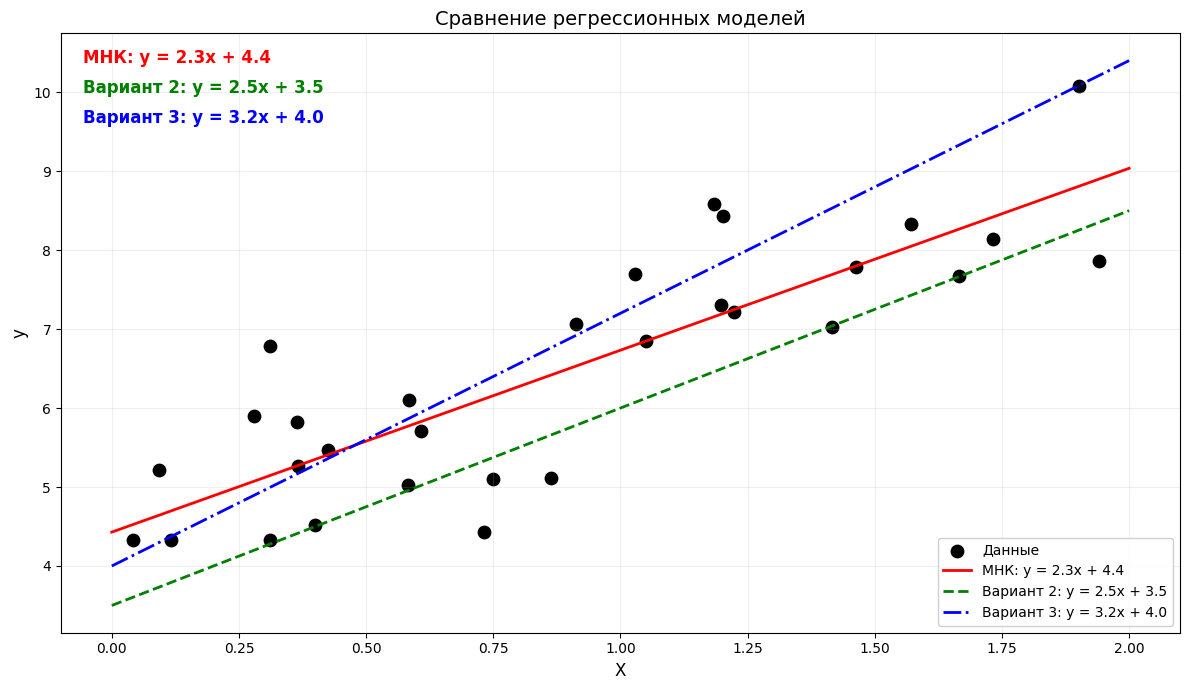

In [1]:
# Код в этой ячейке создан только для визуализации принципа построения линейной регресии, можно его не изучать!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Генерируем данные
np.random.seed(42)
X = 2 * np.random.rand(30, 1)
y = 4 + 3 * X + np.random.randn(30, 1)

# Обучаем классическую линейную регрессию (МНК)
model = LinearRegression()
model.fit(X, y)

# Создаем диапазон для линий
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_line_mnk = model.predict(X_line)
mnk_eq = f'МНК: y = {model.coef_[0][0]:.1f}x + {model.intercept_[0]:.1f}'

# Вариант 2
slope2, intercept2 = 2.5, 3.5
y_line2 = slope2 * X_line + intercept2
eq2 = f'Вариант 2: y = {slope2:.1f}x + {intercept2:.1f}'

# Вариант 3
slope3, intercept3 = 3.2, 4.0
y_line3 = slope3 * X_line + intercept3
eq3 = f'Вариант 3: y = {slope3:.1f}x + {intercept3:.1f}'

# Визуализация
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='black', s=80, label='Данные')

plt.plot(X_line, y_line_mnk, color='red', linewidth=2, label=mnk_eq)
plt.plot(X_line, y_line2, color='green', linestyle='--', linewidth=2, label=eq2)
plt.plot(X_line, y_line3, color='blue', linestyle='-.', linewidth=2, label=eq3)

# Добавляем уравнения на график
plt.text(0.02, 0.95, mnk_eq, color='red', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.text(0.02, 0.90, eq2, color='green', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.text(0.02, 0.85, eq3, color='blue', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Сравнение регрессионных моделей', fontsize=14)
plt.legend(fontsize=10, framealpha=0.9, loc='lower right')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


Основная идея парной линейной регрессии - провести прямую линию, которая бы лучше всего описывала данные. На графике исходные данные обозначены черными точками, а линиями разные варианты прямой, описывающей поведение этих точек. Таких прямых можно провести большое количество и все они на первый взгляд будут отражать общую тенденцию в поведении данных. Как же выбрать лучшую из них?

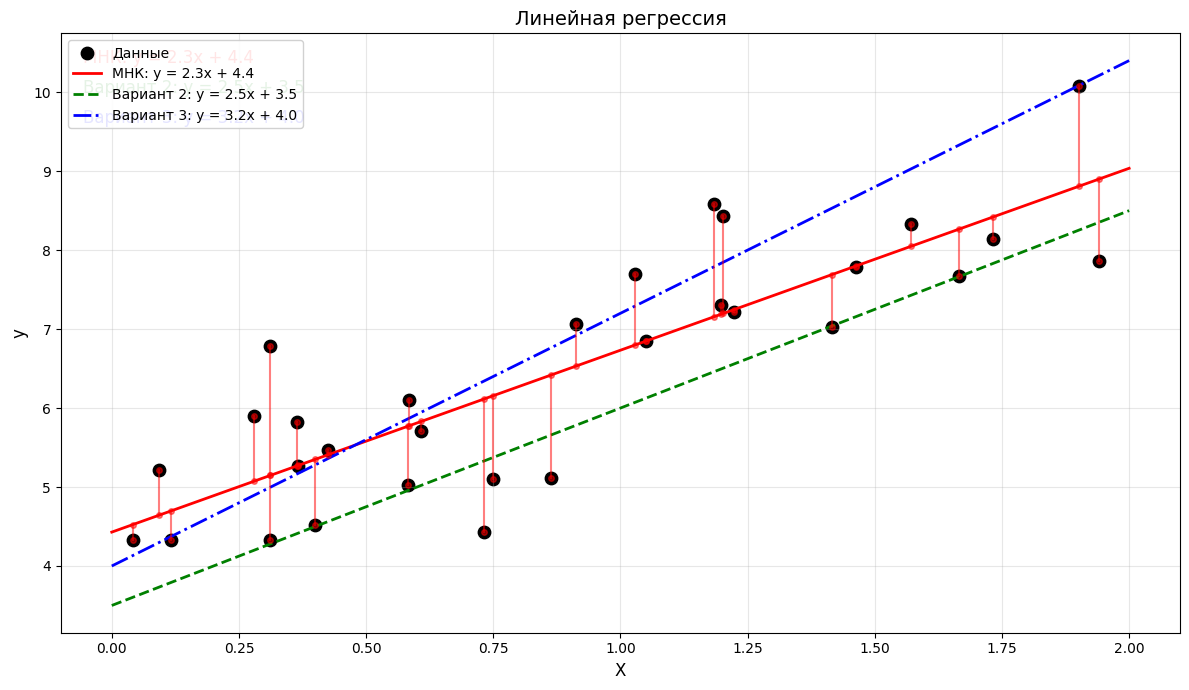

In [2]:
# Код в этой ячейке создан только для визуализации принципа построения линейной регресии, можно его не изучать!

# Генерируем данные
np.random.seed(42)
X = 2 * np.random.rand(30, 1)
y = 4 + 3 * X + np.random.randn(30, 1)

# Обучаем классическую линейную регрессию (МНК)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Создаем диапазон для линий
X_line = np.linspace(0, 2, 100).reshape(-1, 1)

# Линия МНК
y_line_mnk = model.predict(X_line)
mnk_eq = f'МНК: y = {model.coef_[0][0]:.1f}x + {model.intercept_[0]:.1f}'

# Вариант 2: линия с другим наклоном и смещением
slope2, intercept2 = 2.5, 3.5
y_line2 = slope2 * X_line + intercept2
eq2 = f'Вариант 2: y = {slope2:.1f}x + {intercept2:.1f}'

# Вариант 3: ещё один вариант линии
slope3, intercept3 = 3.2, 4.0
y_line3 = slope3 * X_line + intercept3
eq3 = f'Вариант 3: y = {slope3:.1f}x + {intercept3:.1f}'

# Визуализация
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='black', s=80, label='Данные')

# Рисуем линии с подписями уравнений
plt.plot(X_line, y_line_mnk, color='red', linewidth=2, label=mnk_eq)
plt.plot(X_line, y_line2, color='green', linestyle='--', linewidth=2, label=eq2)
plt.plot(X_line, y_line3, color='blue', linestyle='-.', linewidth=2, label=eq3)

# Ошибки только для МНК
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], color='red', linewidth=1.5, 
             marker='o', markersize=4, alpha=0.5)

# Добавляем уравнения на график
text_y = 0.9  # Стартовая позиция для текста
plt.text(0.02, 0.95, mnk_eq, color='red', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.02, 0.90, eq2, color='green', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.02, 0.85, eq3, color='blue', transform=plt.gca().transAxes, fontsize=12)

plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Линейная регрессия', fontsize=14)
plt.legend(fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Лучшей линией будем считать ту, для который сумма квадратов отклонений будет наименьшая. Отклонения на рисунке показаны вертикальными красными линиями. Отклонения берутся в квадрате, чтобы нивелировать знак отклонений, то есть, чтобы отклонения вверх от прямой (положительные) и вниз от прямой (отрицательные) не компенсировали друг друга. Поэтому метод подбора линейной регрессии называется метод наименьших квадратов (англ., Least Squares Method) - МНК (LSM).

Если сумма квадратов отклонений разделить на количество точек в данных, то получится уже известная нам по прошлым занятиям метрика качества $MSE$ - средний квадрат отклонений.

У логистической регресии такой же подход, только по оси ординат не значения целевого признака, а логиты вероятностей для класса 1.

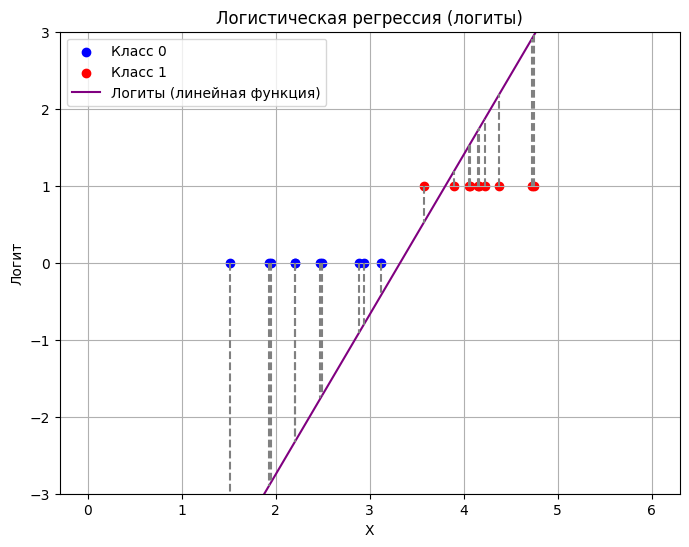

In [3]:
# Код в этой ячейке создан только для визуализации принципа построения логистической регресии, можно его не изучать!

from sklearn.linear_model import LogisticRegression

# Создаем данные для двух классов
np.random.seed(0)
X_class0 = np.random.normal(2, 0.5, 10)
X_class1 = np.random.normal(4, 0.5, 10)
X = np.concatenate([X_class0, X_class1]).reshape(-1, 1)
y = np.array([0]*10 + [1]*10)

# Обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X, y)

# Сетка для построения логитов
X_test = np.linspace(0, 6, 300).reshape(-1, 1)
logits = model.decision_function(X_test)

plt.figure(figsize=(8, 6))

# Точки классов
plt.scatter(X[y==0], y[y==0], color='blue', label='Класс 0')
plt.scatter(X[y==1], y[y==1], color='red', label='Класс 1')

# Логиты (линейная функция)
plt.plot(X_test, logits, color='purple', label='Логиты (линейная функция)')

# Ошибки: вертикальные линии от метки (0 или 1) до логита
for xi, yi in zip(X.flatten(), y):
    logit = model.decision_function([[xi]])[0]
    plt.vlines(x=xi, ymin=yi, ymax=logit, color='gray', linestyle='dashed')

plt.title('Логистическая регрессия (логиты)')
plt.xlabel('X')
plt.ylabel('Логит')
plt.ylim(-3, 3)
plt.legend()
plt.grid(True)
plt.show()

С увеличение количества признаков общая идея метода сохраняется, но прямая линия заменяется плоскостью в трехмерном пространстве или гиперплоскостью в пространстве большей размерности.

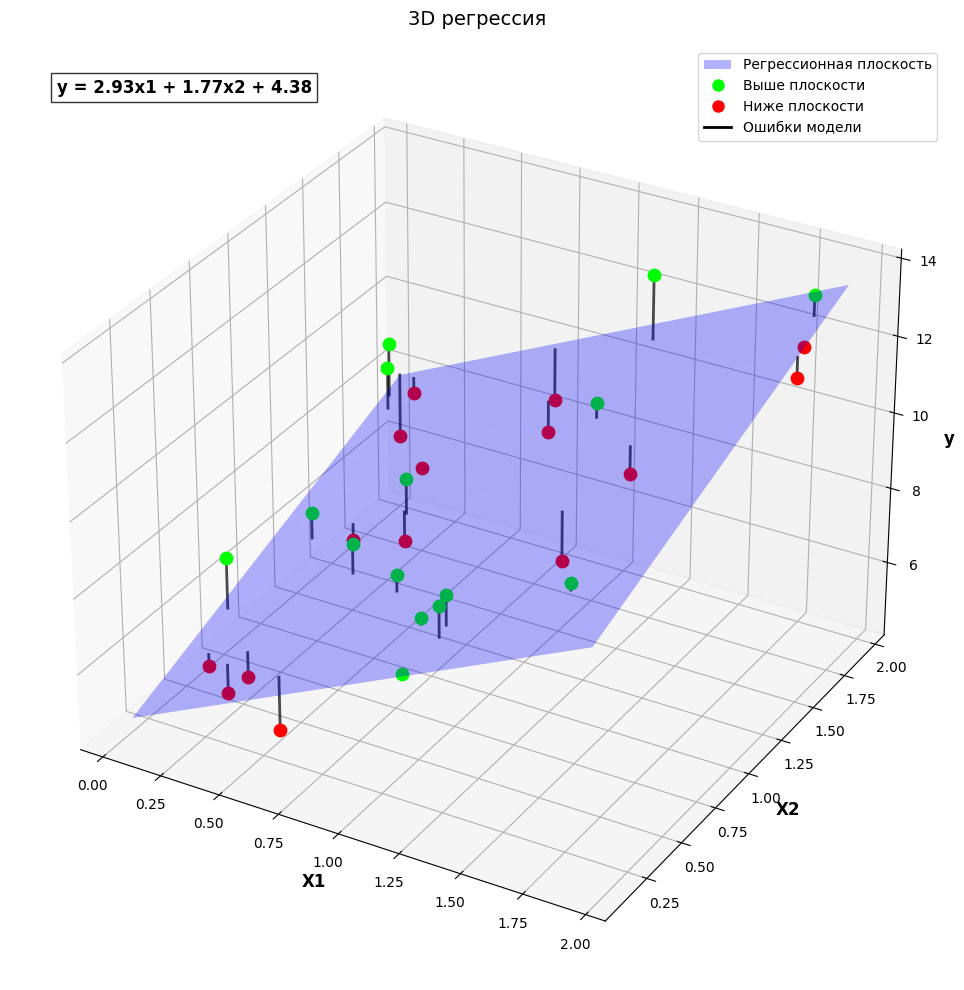

In [4]:
# Код в этой ячейке создан только для визуализации принципа построения линейной регресии, можно его не изучать!

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Генерация данных
np.random.seed(42)
X = np.random.rand(30, 2) * 2
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(30)

# Обучение модели
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Сетка для поверхности
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
x1_surf, x2_surf = np.meshgrid(x1_range, x2_range)
X_surf = np.column_stack((x1_surf.ravel(), x2_surf.ravel()))
y_surf = model.predict(X_surf).reshape(x1_surf.shape)

# Визуализация
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Плоскость регрессии
surface = ax.plot_surface(x1_surf, x2_surf, y_surf, 
                         color='blue', 
                         alpha=0.3, 
                         edgecolor='none')

# Точки данных
above_plane = y > y_pred
scatter_above = ax.scatter(X[above_plane, 0], X[above_plane, 1], y[above_plane],
                          color='lime', s=80, depthshade=False)
scatter_below = ax.scatter(X[~above_plane, 0], X[~above_plane, 1], y[~above_plane],
                          color='red', s=80, depthshade=False)

# Линии ошибок
for i in range(len(X)):
    ax.plot([X[i, 0], X[i, 0]], 
            [X[i, 1], X[i, 1]],
            [y[i], y_pred[i]], 
            color='black', 
            linewidth=2.0,  
            alpha=0.7)     

# Настройки осей
ax.set_xlabel('X1', fontsize=12, fontweight='bold')
ax.set_ylabel('X2', fontsize=12, fontweight='bold')
ax.set_zlabel('y', fontsize=12, fontweight='bold')
ax.set_title('3D регрессия', fontsize=14, pad=15)

# Уравнение модели
equation = f'y = {model.coef_[0]:.2f}x1 + {model.coef_[1]:.2f}x2 + {model.intercept_:.2f}'
ax.text2D(0.05, 0.95, equation, transform=ax.transAxes, 
          fontsize=12, fontweight='bold',
          bbox=dict(facecolor='white', alpha=0.8))

# Легенда
legend_elements = [
    Patch(facecolor='blue', alpha=0.3, label='Регрессионная плоскость'),
    Line2D([0], [0], marker='o', color='w', label='Выше плоскости',
          markerfacecolor='lime', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Ниже плоскости',
          markerfacecolor='red', markersize=10),
    Line2D([0], [0], color='black', linewidth=2, label='Ошибки модели')
]

ax.legend(handles=legend_elements, loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


Одним из недостатков линейной регрессии является высокая требовательность к данным. В частности, добавление всего одного аномального наблюдения может привести к кардинальному изменению модели.

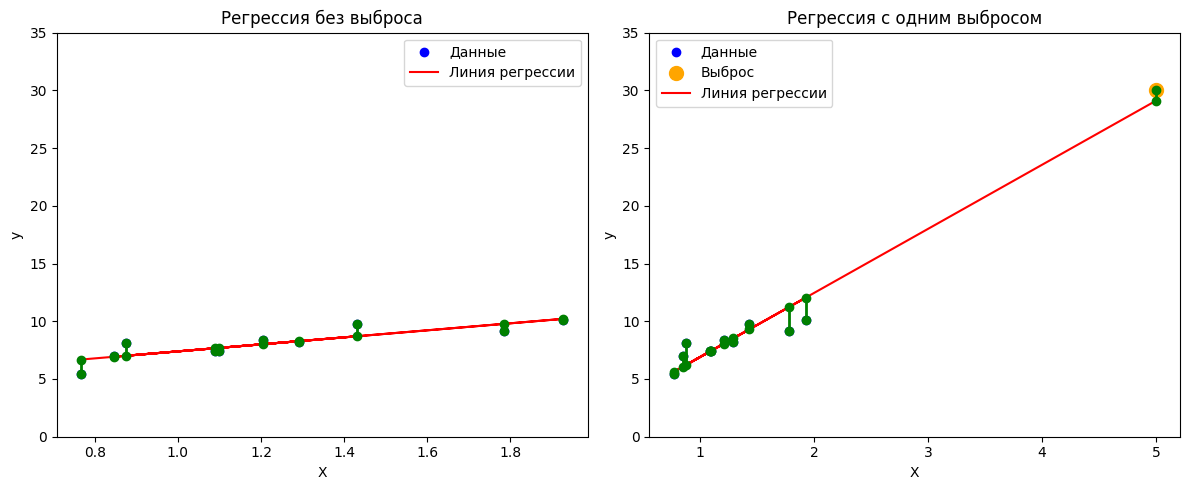

In [5]:
# Код в этой ячейке создан только для визуализации влияния выброса на линейную регресию, можно его не изучать!

# Генерируем данные
np.random.seed(0)
X = 2 * np.random.rand(10, 1)
y = 4 + 3 * X + np.random.randn(10, 1)

# Добавляем выброс
X_outlier = np.append(X, [[5]], axis=0)
y_outlier = np.append(y, [[30]], axis=0)

# Обучаем модели
model_clean = LinearRegression()
model_clean.fit(X, y)
y_pred_clean = model_clean.predict(X)

model_outlier = LinearRegression()
model_outlier.fit(X_outlier, y_outlier)
y_pred_outlier = model_outlier.predict(X_outlier)

plt.figure(figsize=(12, 5))

# Без выброса
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, y_pred_clean, color='red', label='Линия регрессии')
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred_clean[i]], color='green', linewidth=2, marker='o')  # ошибки
plt.title('Регрессия без выброса')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.ylim(0, 35)

# С выбросом
plt.subplot(1, 2, 2)
plt.scatter(X_outlier[:-1], y_outlier[:-1], color='blue', label='Данные')
plt.scatter(X_outlier[-1], y_outlier[-1], color='orange', label='Выброс', s=100)
plt.plot(X_outlier, y_pred_outlier, color='red', label='Линия регрессии')
for i in range(len(X_outlier)):
    plt.plot([X_outlier[i], X_outlier[i]], [y_outlier[i], y_pred_outlier[i]], color='green', linewidth=2, marker='o')  # ошибки
plt.title('Регрессия с одним выбросом')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.ylim(0, 35)

plt.tight_layout()
plt.show()


## Идея метода опорных векторов

Метод опорных векторов (англ., Support Vector Machine, SVM) - это тоже **линейная модель**, но идея метода другая. Если метод наименьших квадратов пытается подстроится по каждую точку данных, так как минимизуруется сумма квадратов ***всех отклонений***, то метод опорных векторов строит прямую (или гиперплоскость в многомерном случае), которая находится по опорным точкам. 

В случае задачи бинарной (двуклассовой) классификации провести прямую нужно так, чтобы разделить точки, принадлежащие разным классам.

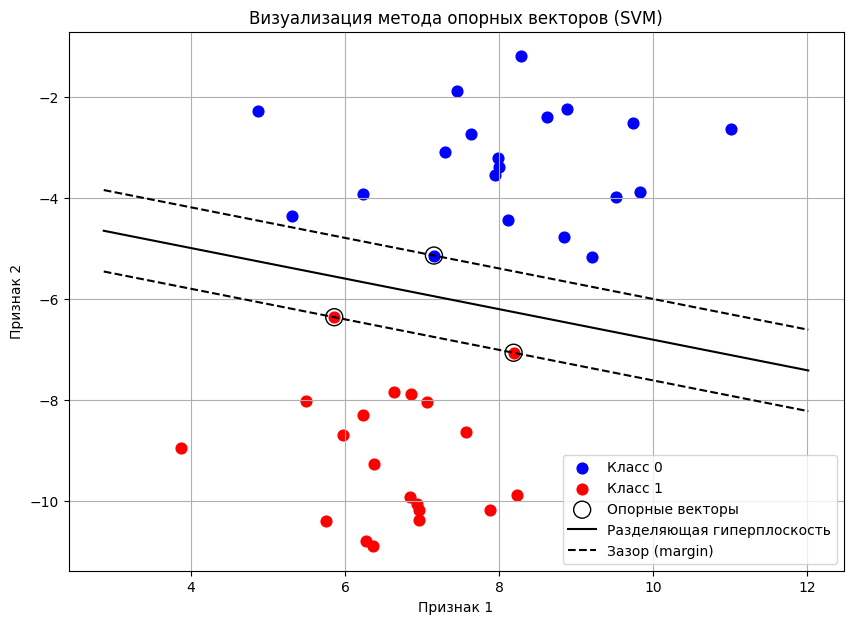

In [6]:
# Код в этой ячейке создан только для визуализации метода опорных векторов, можно его не изучать!

from sklearn import svm
from sklearn.datasets import make_blobs

# Генерируем двумерный набор данных с двумя классами
X, y = make_blobs(n_samples=40, centers=2, random_state=6, cluster_std=1.2)

# Обучаем линейный SVM
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, y)

# Получаем параметры разделяющей гиперплоскости
w = model.coef_[0]
b = model.intercept_[0]
# Коэффициенты для прямой: w0*x + w1*y + b = 0

# Создаем сетку для построения линии
x_plot = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
y_plot = -(w[0] * x_plot + b) / w[1]

# Вычисляем линии зазора (margin)
margin = 1 / np.linalg.norm(w)
y_margin_up = y_plot + np.sqrt(1 + (w[0]/w[1])**2) * margin
y_margin_down = y_plot - np.sqrt(1 + (w[0]/w[1])**2) * margin

# Визуализация
plt.figure(figsize=(10, 7))

# Точки классов
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Класс 0', s=60)
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Класс 1', s=60)

# Опорные векторы
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='k', label='Опорные векторы')

# Разделяющая гиперплоскость
plt.plot(x_plot, y_plot, 'k-', label='Разделяющая гиперплоскость')

# Линии зазора (margin)
plt.plot(x_plot, y_margin_up, 'k--', label='Зазор (margin)')
plt.plot(x_plot, y_margin_down, 'k--')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Визуализация метода опорных векторов (SVM)')
plt.legend()
plt.grid(True)
plt.show()


Точки, которые ближе всего расположены к разделяющей прямой называются опорными точками (или опорными векторами). Подбирают прямую так, чтобы увеличить зазор (англ., margin) между опорными точками.

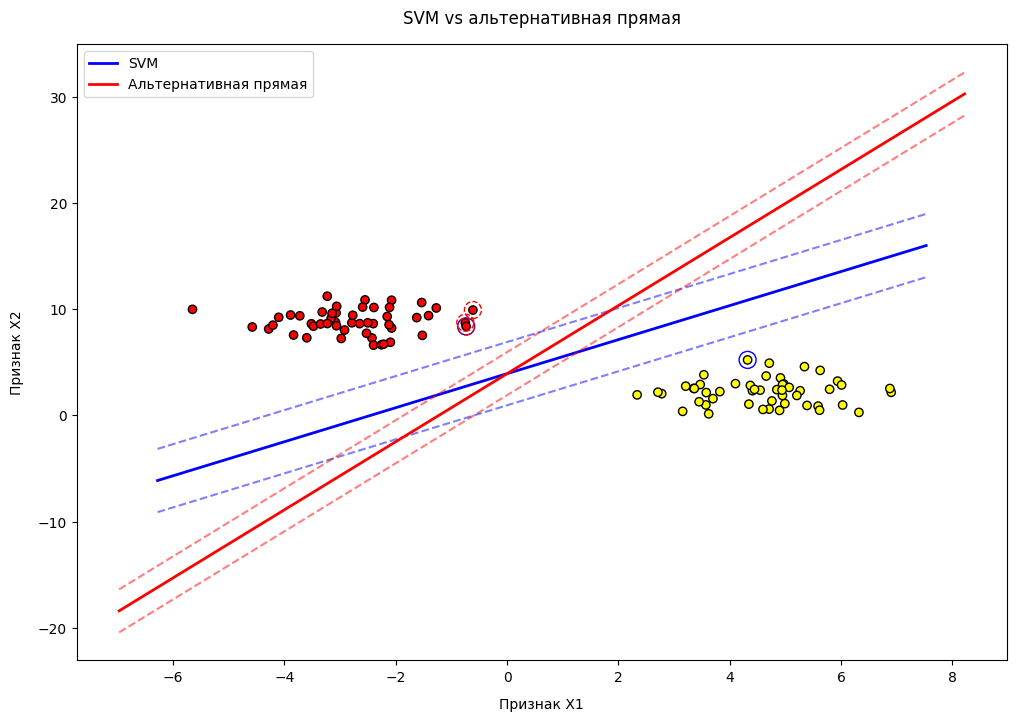

In [7]:
# Код в этой ячейке создан только для визуализации метода опорных векторов, можно его не изучать!

# Генерация данных
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.2, random_state=42)

# Обучение SVM
svm_clf = svm.SVC(kernel='linear', C=1)
svm_clf.fit(X, y)

# Параметры SVM
w_svm = svm_clf.coef_[0]
b_svm = svm_clf.intercept_[0]

# Альтернативная прямая с увеличенным slope
w_alt = w_svm.copy()
w_alt[0] *= 2.0  # Увеличиваем коэффициент при X1
b_alt = b_svm     # Сохраняем intercept

# Функция для построения границ с зазорами через опорные векторы
def plot_svm_with_support_margin(ax, model, color, label):
    # Основная гиперплоскость
    w = model.coef_[0]
    b = model.intercept_[0]
    x_min, x_max = ax.get_xlim()
    xx = np.linspace(x_min, x_max, 100)
    yy = (-w[0]*xx - b) / w[1]
    ax.plot(xx, yy, '-', color=color, linewidth=2, label=label)
    
    # Опорные векторы
    sv = model.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=150, facecolors='none', edgecolors=color)
    
    # Зазоры (касаются опорных векторов)
    margin = 1 / np.sqrt(w[0]**2 + w[1]**2)
    yy_upper = yy + margin
    yy_lower = yy - margin
    ax.plot(xx, yy_upper, '--', color=color, alpha=0.5)
    ax.plot(xx, yy_lower, '--', color=color, alpha=0.5)

# Для альтернативной прямой (искусственные "опорные векторы")
def plot_custom_line_with_margin(ax, w, b, color, label):
    # Основная линия
    x_min, x_max = ax.get_xlim()
    xx = np.linspace(x_min, x_max, 100)
    yy = (-w[0]*xx - b) / w[1]
    ax.plot(xx, yy, '-', color=color, linewidth=2, label=label)
    
    # Искусственные "опорные векторы" (ближайшие точки к линии)
    distances = np.abs(w[0]*X[:, 0] + w[1]*X[:, 1] + b) / np.sqrt(w[0]**2 + w[1]**2)
    closest_idx = np.argpartition(distances, 3)[:3]  # 3 ближайшие точки
    sv_custom = X[closest_idx]
    ax.scatter(sv_custom[:, 0], sv_custom[:, 1], s=150, 
               facecolors='none', edgecolors=color, linestyle='--')
    
    # Зазоры (рассчитываем через расстояния до искусственных SV)
    margin = np.min(distances[closest_idx])
    yy_upper = yy + margin
    yy_lower = yy - margin
    ax.plot(xx, yy_upper, '--', color=color, alpha=0.5)
    ax.plot(xx, yy_lower, '--', color=color, alpha=0.5)

# Визуализация
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k')

# 1. SVM с корректными зазорами
plot_svm_with_support_margin(ax, svm_clf, 'blue', 'SVM')

# 2. Альтернативная прямая с искусственными зазорами
plot_custom_line_with_margin(ax, w_alt, b_alt, 'red', 'Альтернативная прямая')

ax.set_title('SVM vs альтернативная прямая', pad=15)
ax.set_xlabel('Признак X1', labelpad=10)
ax.set_ylabel('Признак X2', labelpad=10)
ax.legend()
plt.show()


Зазор (margin) - мера уверенности классификации. Больший зазор означает, что большинство объектов находятся далеко от разделяющей гиперплоскости, что снижает вероятность ошибок.

Однако, не всегда данные можно четко разделить на классы при помощи прямой линиий (гиперплоскости), так как они могут перекрываться или быть линейно неразделимы. 

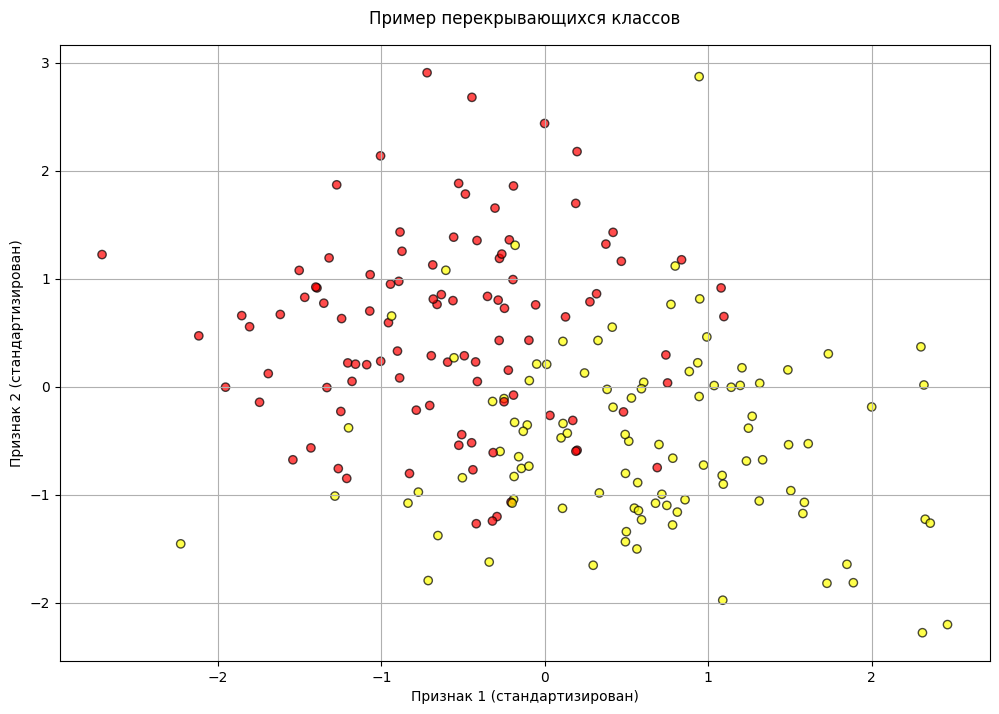

In [8]:
# Код в этой ячейке создан только для визуализации метода опорных векторов, можно его не изучать!

from sklearn.preprocessing import StandardScaler

# Генерация данных с сильным перекрытием
X, y = make_blobs(n_samples=200, centers=2, cluster_std=3.0, 
                 random_state=42, center_box=(-5, 5))

# Масштабирование для лучшей визуализации
X = StandardScaler().fit_transform(X)

# Визуализация
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn', edgecolors='k', alpha=0.7)
plt.title('Пример перекрывающихся классов', pad=15)
plt.xlabel('Признак 1 (стандартизирован)')
plt.ylabel('Признак 2 (стандартизирован)')
plt.grid(True)
plt.show()


Для этого существует мягкий зазор (soft margin) - механизм, который допускает ошибки классификации при построении разделяющей прямой (гиперплоскости). Задается он при помощи параметра $C$, контролирующего баланс между шириной зазора и штрафом за ошибки.Этот параметр принимает положительные значения: 
- чем больше его значение, тем более жесткий будет зазор (то есть не будет допускать расположения точек внутри зазора или в другом классе);
- чем ближе к нулю, тем более мягкий будет зазор (сильнее будут игнорироваться ошибки классификации).

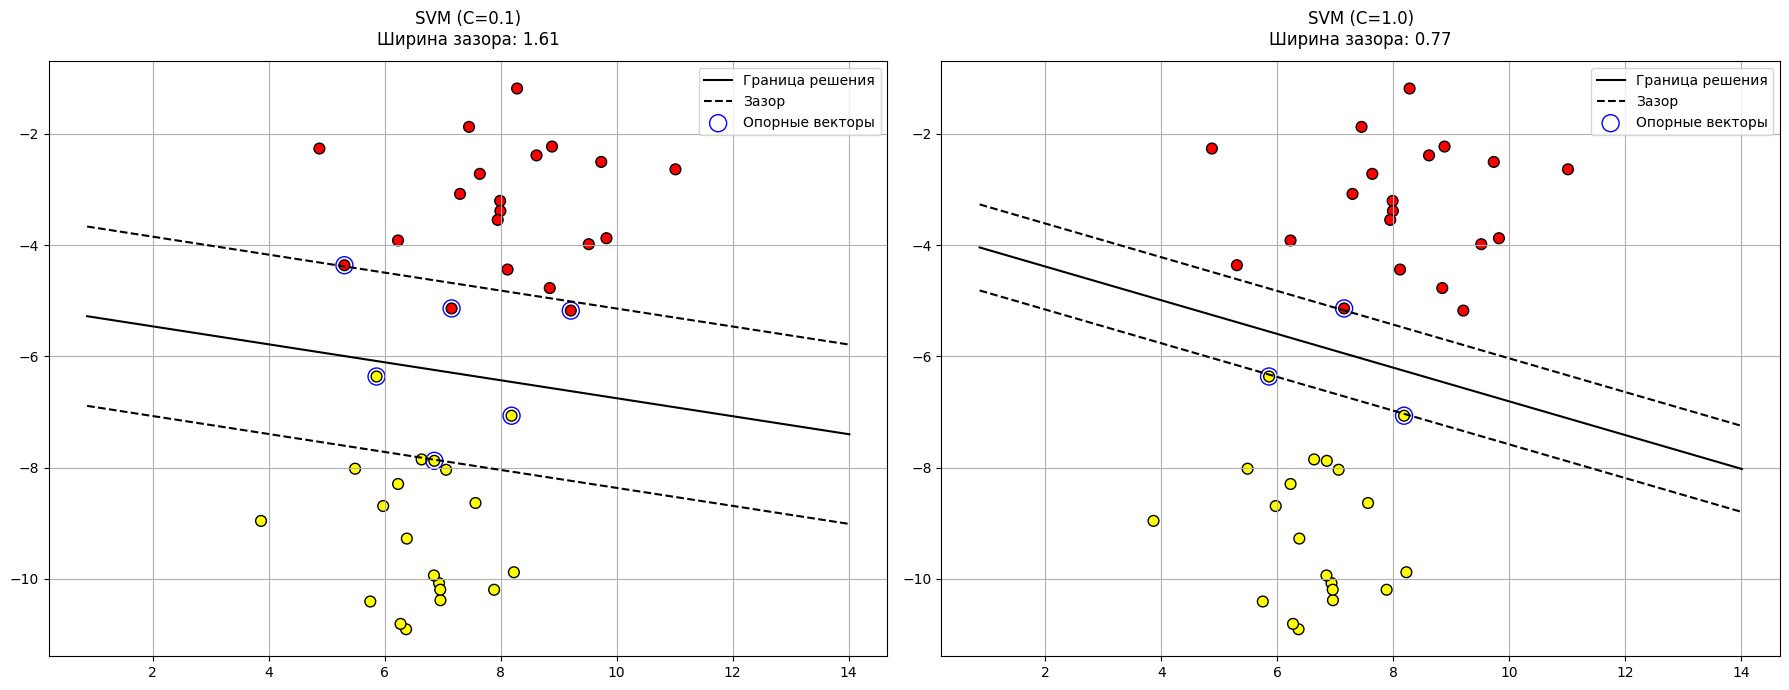

In [9]:
# Код в этой ячейке создан только для визуализации метода опорных векторов, можно его не изучать!

# Генерация данных
X, y = make_blobs(n_samples=40, centers=2, random_state=6, cluster_std=1.2)

# Функция для сравнения C=0.1 и C=1
def plot_svm_comparison(X, y, C_values):
    fig, axs = plt.subplots(1, 2, figsize=(18, 7))
    
    for i, C in enumerate(C_values):
        model = svm.SVC(kernel='linear', C=C)
        model.fit(X, y)
        
        # Границы
        w = model.coef_[0]
        b = model.intercept_[0]
        x_plot = np.linspace(X[:,0].min()-3, X[:,0].max()+3, 200)
        y_plot = -(w[0]*x_plot + b)/w[1]
        
        # Зазоры
        margin = 1/np.linalg.norm(w)
        y_upper = y_plot + margin
        y_lower = y_plot - margin

        # Визуализация
        axs[i].scatter(X[:,0], X[:,1], c=y, cmap='autumn', edgecolors='k', s=60)
        axs[i].plot(x_plot, y_plot, 'k-', label='Граница решения')
        axs[i].plot(x_plot, y_upper, 'k--', label='Зазор')
        axs[i].plot(x_plot, y_lower, 'k--')
        axs[i].scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
                      s=150, facecolors='none', edgecolors='blue', 
                      label='Опорные векторы')
        axs[i].set_title(f'SVM (C={C})\nШирина зазора: {margin:.2f}', pad=12)
        axs[i].legend()
        axs[i].grid(True)
    
    plt.tight_layout()
    plt.show()

# Сравниваем C=0.1 и C=1
plot_svm_comparison(X, y, C_values=[0.1, 1.0])


На рисунке слева установлен мягкий зазор, а справа более жесткий. При этом на левом рисунке несколько точек попало в зазор. Зазор правого рисунка уже более, чем в 2 раза.

Добавление аномального значения не оказывает такого влияния на модель, как в случае с методом наименьших квадратов.

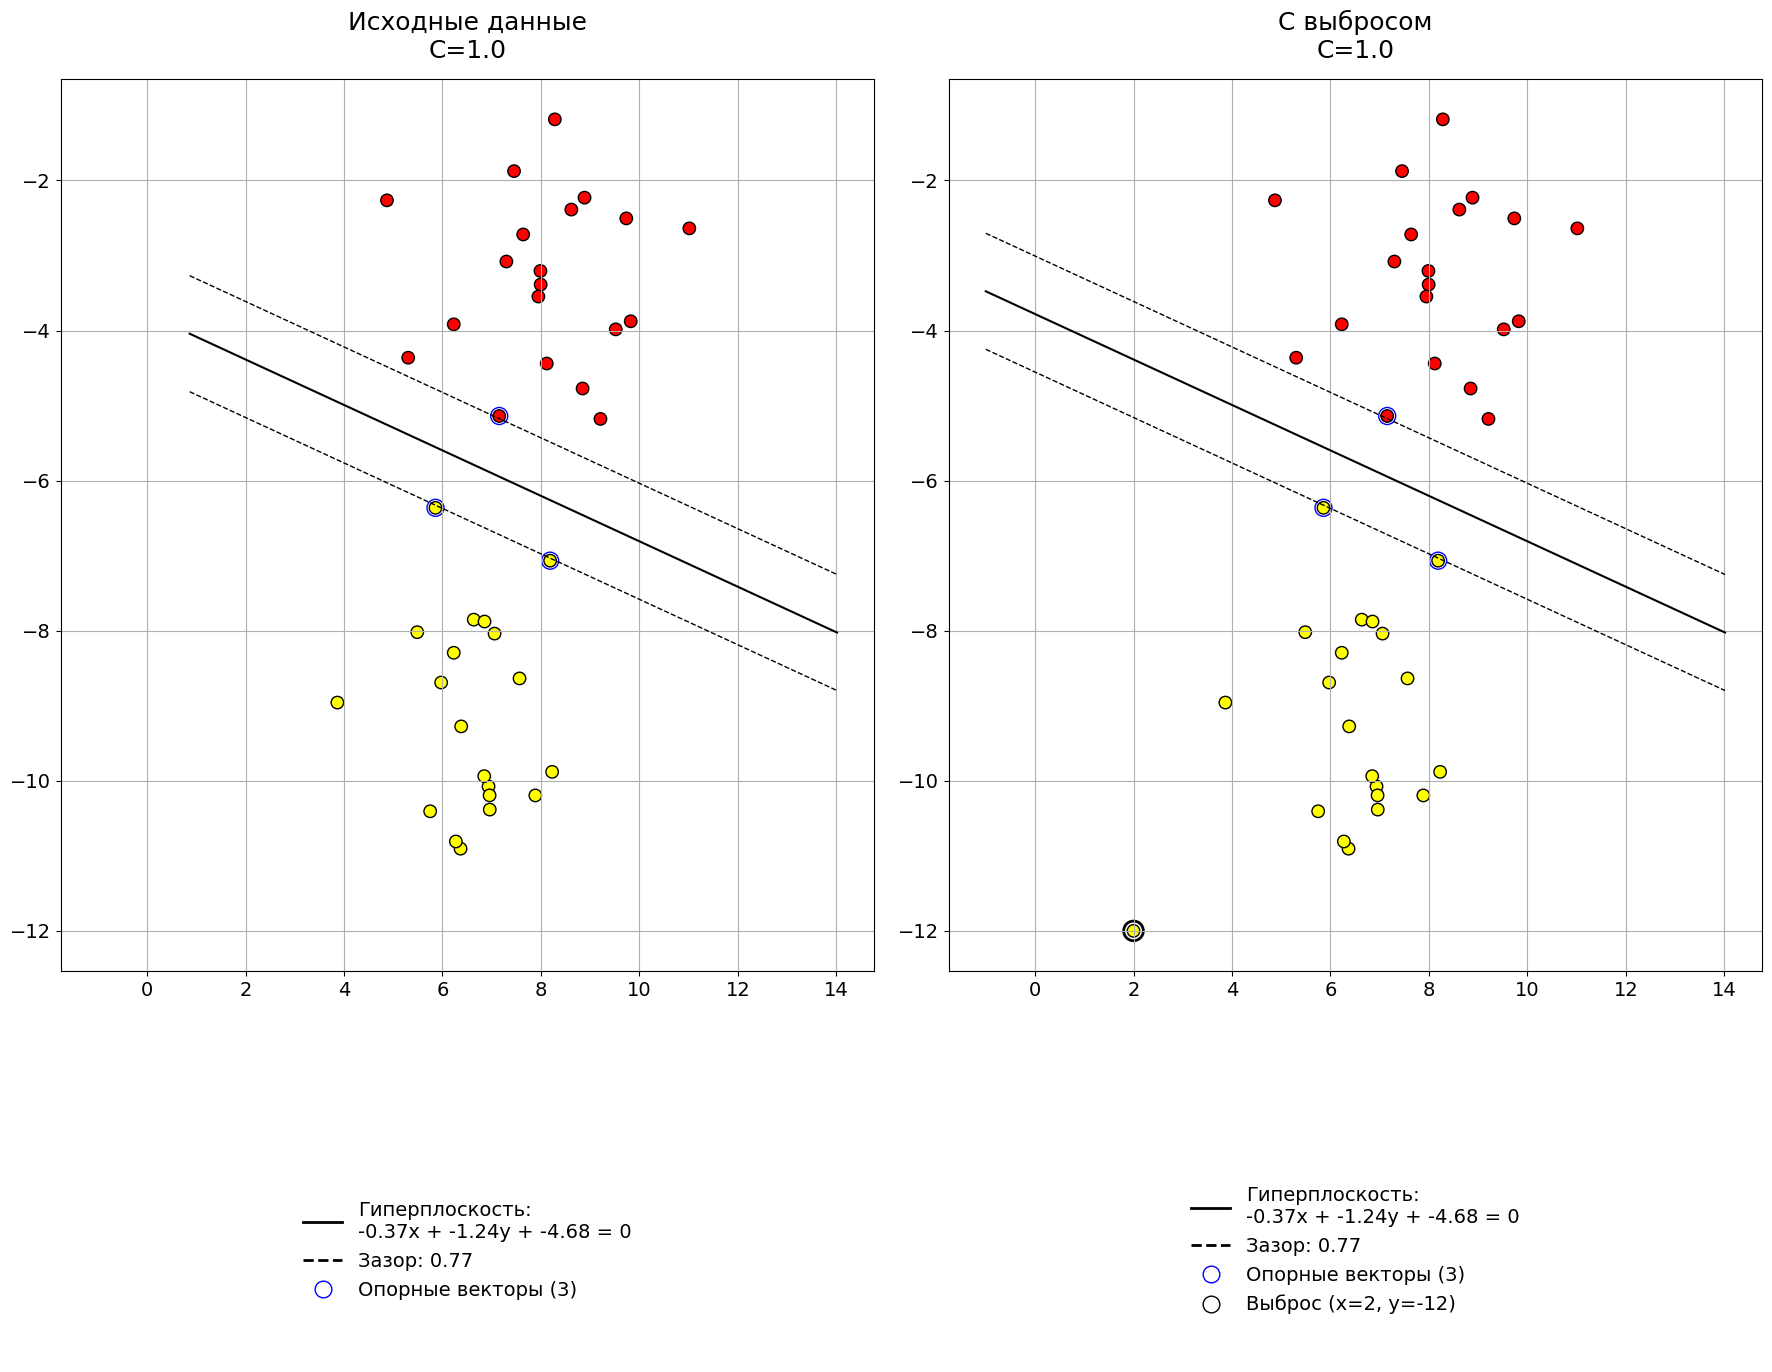

In [10]:
# Код в этой ячейке создан только для визуализации метода опорных векторов, можно его не изучать!

# Глобальные настройки шрифтов
plt.rcParams.update({
    'font.size': 16,           # Базовый размер
    'axes.titlesize': 18,      # Заголовки графиков
    'axes.labelsize': 16,      # Метки осей
    'xtick.labelsize': 14,     # Метки тиков на оси X
    'ytick.labelsize': 14,     # Метки тиков на оси Y
    'legend.fontsize': 18      # Легенда
})

# Генерация данных
X, y = make_blobs(n_samples=40, centers=2, random_state=6, cluster_std=1.2)

# Добавляем аномалию
X_anomaly = np.vstack([X, [2, -12]])
y_anomaly = np.append(y, 1)

# Сетка графиков
fig, axs = plt.subplots(2, 2, figsize=(18, 14), 
                       gridspec_kw={'height_ratios': [4, 1]})
axs = axs.reshape(2, 2)

def plot_svm(X, y, title, ax, C, highlight_anomaly=False):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X, y)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    x_plot = np.linspace(X[:,0].min()-3, X[:,0].max()+3, 200)
    y_plot = -(w[0]*x_plot + b)/w[1]
    
    equation = f'{w[0]:.2f}x + {w[1]:.2f}y + {b:.2f} = 0'
    margin = 1/np.linalg.norm(w)
    
    # Визуализация
    ax.scatter(X[:,0], X[:,1], c=y, cmap='autumn', edgecolors='k', s=80)
    
    if highlight_anomaly:
        ax.scatter(X[-1,0], X[-1,1], s=200, facecolors='none', 
                  edgecolors='black', linewidths=2)
    
    ax.plot(x_plot, y_plot, 'k-', linewidth=1.5)
    ax.plot(x_plot, y_plot + margin, 'k--', linewidth=1)
    ax.plot(x_plot, y_plot - margin, 'k--', linewidth=1)
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
              s=150, facecolors='none', edgecolors='blue')
    
    ax.set_title(f'{title}\nC={C}', pad=15, fontsize=18)
    ax.grid(True)
    
    legend_data = [
        {'label': f'Гиперплоскость:\n{equation}', 'ls': '-', 'color': 'k'},
        {'label': f'Зазор: {margin:.2f}', 'ls': '--', 'color': 'k'},
        {'label': f'Опорные векторы ({len(model.support_vectors_)})', 
         'marker': 'o', 'mec': 'blue', 'mfc': 'none'},
    ]
    
    if highlight_anomaly:
        legend_data.append({'label': 'Выброс (x=2, y=-12)', 
                          'marker': 'o', 'mec': 'black', 'mfc': 'none'})
    
    return legend_data

# Построение графиков
legends = []
leg_data = plot_svm(X, y, 'Исходные данные', axs[0,0], C=1.0)
legends.append(leg_data)

leg_data = plot_svm(X_anomaly, y_anomaly, title='С выбросом', ax=axs[0,1], C=1.0, highlight_anomaly=True)
legends.append(leg_data)

# Единые масштабы осей
x_min = min(axs[0,0].get_xlim()[0], axs[0,1].get_xlim()[0])
x_max = max(axs[0,0].get_xlim()[1], axs[0,1].get_xlim()[1])
y_min = min(axs[0,0].get_ylim()[0], axs[0,1].get_ylim()[0])
y_max = max(axs[0,0].get_ylim()[1], axs[0,1].get_ylim()[1])

for ax in [axs[0,0], axs[0,1]]:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.tick_params(axis='both', labelsize=14)

# Легенды
for i in range(2):
    axs[1,i].axis('off')
    custom_lines = []
    labels = []
    
    for entry in legends[i]:
        if 'ls' in entry:
            line = plt.Line2D([], [], color=entry['color'], 
                            linestyle=entry['ls'], lw=2)
            custom_lines.append(line)
        else:
            marker = plt.Line2D([], [], marker=entry['marker'],
                              color=entry['mec'], markerfacecolor=entry['mfc'],
                              markersize=12, linestyle='')
            custom_lines.append(marker)
        labels.append(entry['label'])
    
    axs[1,i].legend(custom_lines, labels, loc='center', 
                   frameon=False, handlelength=2, fontsize=14)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()


## Ядра в методе опорных векторов

Данные не всегда удается разделить при помощи прямой, даже с учетом мягкого зазора, так как это разделение по своей природе может быть не линейно. Для этого случае в модели опорных векторов есть ядерное преобразование (англ., kernel trick). Это преобразование повышает размерность данных, чтобы можно было их разделить линейной функцией:

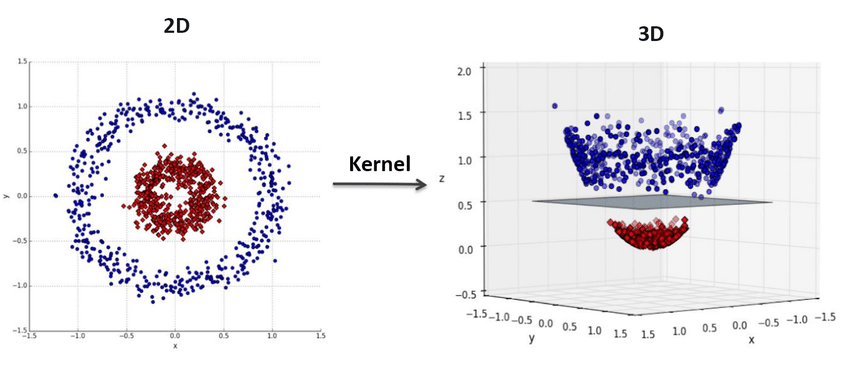

В проекции это будет выглядеть как нелинейное разделение:

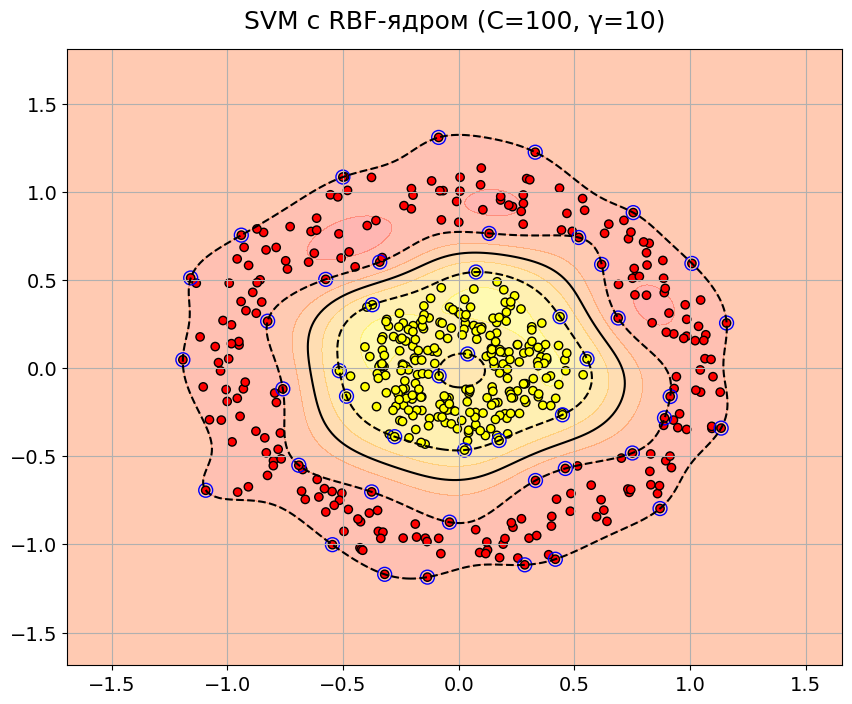

In [11]:
# Код в этой ячейке создан только для визуализации метода опорных векторов, можно его не изучать!

from sklearn.svm import SVC
from sklearn.datasets import make_circles

# Генерация данных: окружность + кольцо
X, y = make_circles(n_samples=500, noise=0.1, factor=0.3, random_state=42)

# Обучение SVM с RBF-ядром
model = SVC(kernel='rbf', C=100, gamma=10)
model.fit(X, y)

# Создание сетки для предсказаний
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='autumn')
    plt.contour(xx, yy, Z, colors='k', levels=[-1,0,1], linestyles=['--','-','--'])
    plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn', edgecolors='k')
    plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
               s=100, facecolors='none', edgecolors='blue')
    plt.title(f'SVM с RBF-ядром (C={model.C}, γ={model.gamma})', pad=15)

# Визуализация
plt.figure(figsize=(10,8))
plot_decision_boundary(model, X, y)
plt.grid(True)
plt.show()


Таким образом, хотя метод опорных векторов линейная модель при помощи ядра она может строить и нелинейные границы между классами.

Вот некоторые функции ядер, которые используются в методе опорных векторов:

1. Радиальная базисная функция (англ., radial basis function, RBF): $$ K(x, y) = e ^{-\gamma \cdot \lvert x-y \rvert ^2}.$$
где $\gamma$ — параметр масштаба.

2. Сигмоидное ядро (англ. sigmoid kernel) также известно как гиперболический тангенс: $$ K(x, y) = \tanh(\gamma \langle x, y \rangle + r), $$
где $\gamma$ — параметр масштаба, $r$ — параметр сдвига, $\langle x, x' \rangle$ — скалярное произведение векторов.

3. Полиномиальное ядро (англ. polynomial kernel) вычисляет ядро полинома степени d между двумя векторами: $$ K(\mathbf{x}, \mathbf{y}) = (\gamma \langle \mathbf{x}, \mathbf{y} \rangle + r)^d, $$
где $\gamma$ — параметр масштаба, $r$ — параметр сдвига, $\langle x, x' \rangle$ — скалярное произведение векторов.

4. Линейное ядро (англ., linear)  - это простейшая функция ядра, которая не выполняет нелинейного преобразования данных. Оно используется для линейно разделимых задач, где классы можно разделить гиперплоскостью в исходном пространстве признаков.

Параметр масштаба гамма ($\gamma$) в функции ядра влияет на поведение границы, разделяющей  классы: 
- чем больше $\gamma$, тем больше сложных изгибов на границе, что может привести к переобучению; 
- чем меньше $\gamma$, тем более прямолинейная будет граница, что может привести к недообучению.

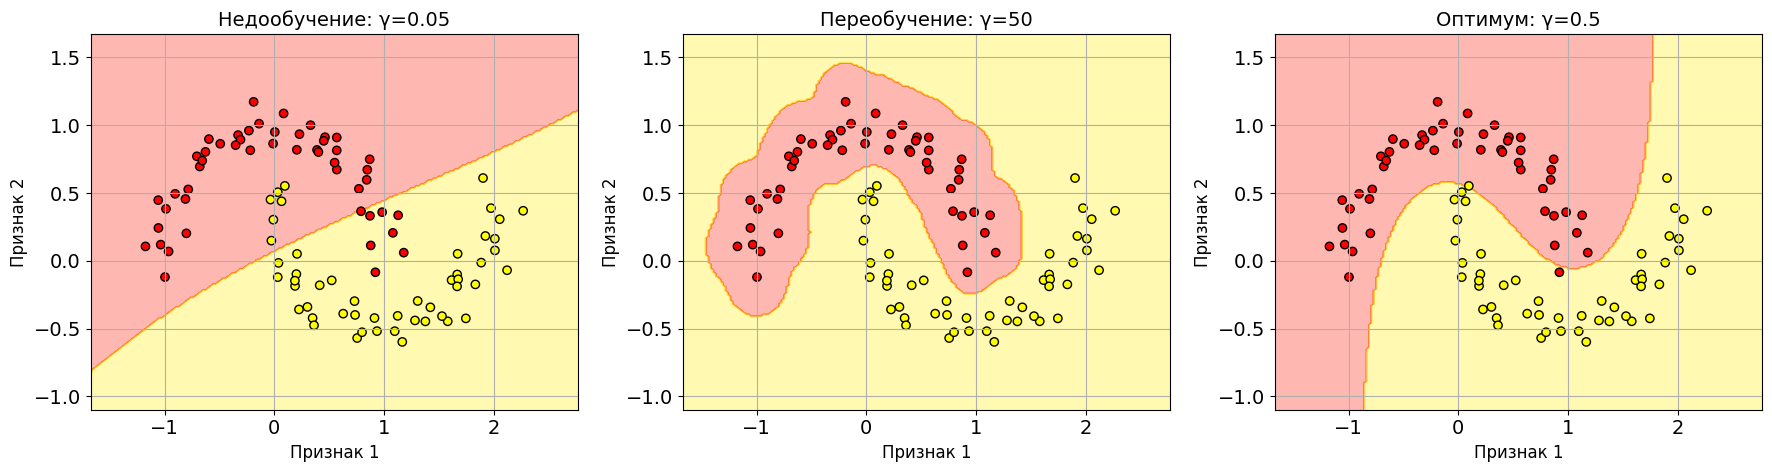

In [12]:
# Код в этой ячейке создан только для визуализации метода опорных векторов, можно его не изучать!

from sklearn.datasets import make_moons

# Генерация данных (линейно неразделимые)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Создаем сетку для визуализации
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Предсказание для всей сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Визуализация
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='autumn')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k')
    plt.title(title, fontsize=14)
    plt.xlabel('Признак 1', fontsize=12)
    plt.ylabel('Признак 2', fontsize=12)

# Создаем 3 модели с разными параметрами
models = [
    ('Недообучение: γ=0.05', svm.SVC(kernel='rbf', gamma=0.05, C=5)),
    ('Переобучение: γ=50', svm.SVC(kernel='rbf', gamma=50, C=5)),
    ('Оптимум: γ=0.5', svm.SVC(kernel='rbf', gamma=0.5, C=5))
]

plt.figure(figsize=(18, 5))
for i, (title, model) in enumerate(models):
    model.fit(X, y)
    plt.subplot(1, 3, i+1)
    plot_decision_boundary(model, X, y, title)
    plt.grid(True)
    
plt.tight_layout()
plt.show()


Построим модели для разных ядер и сраним их:

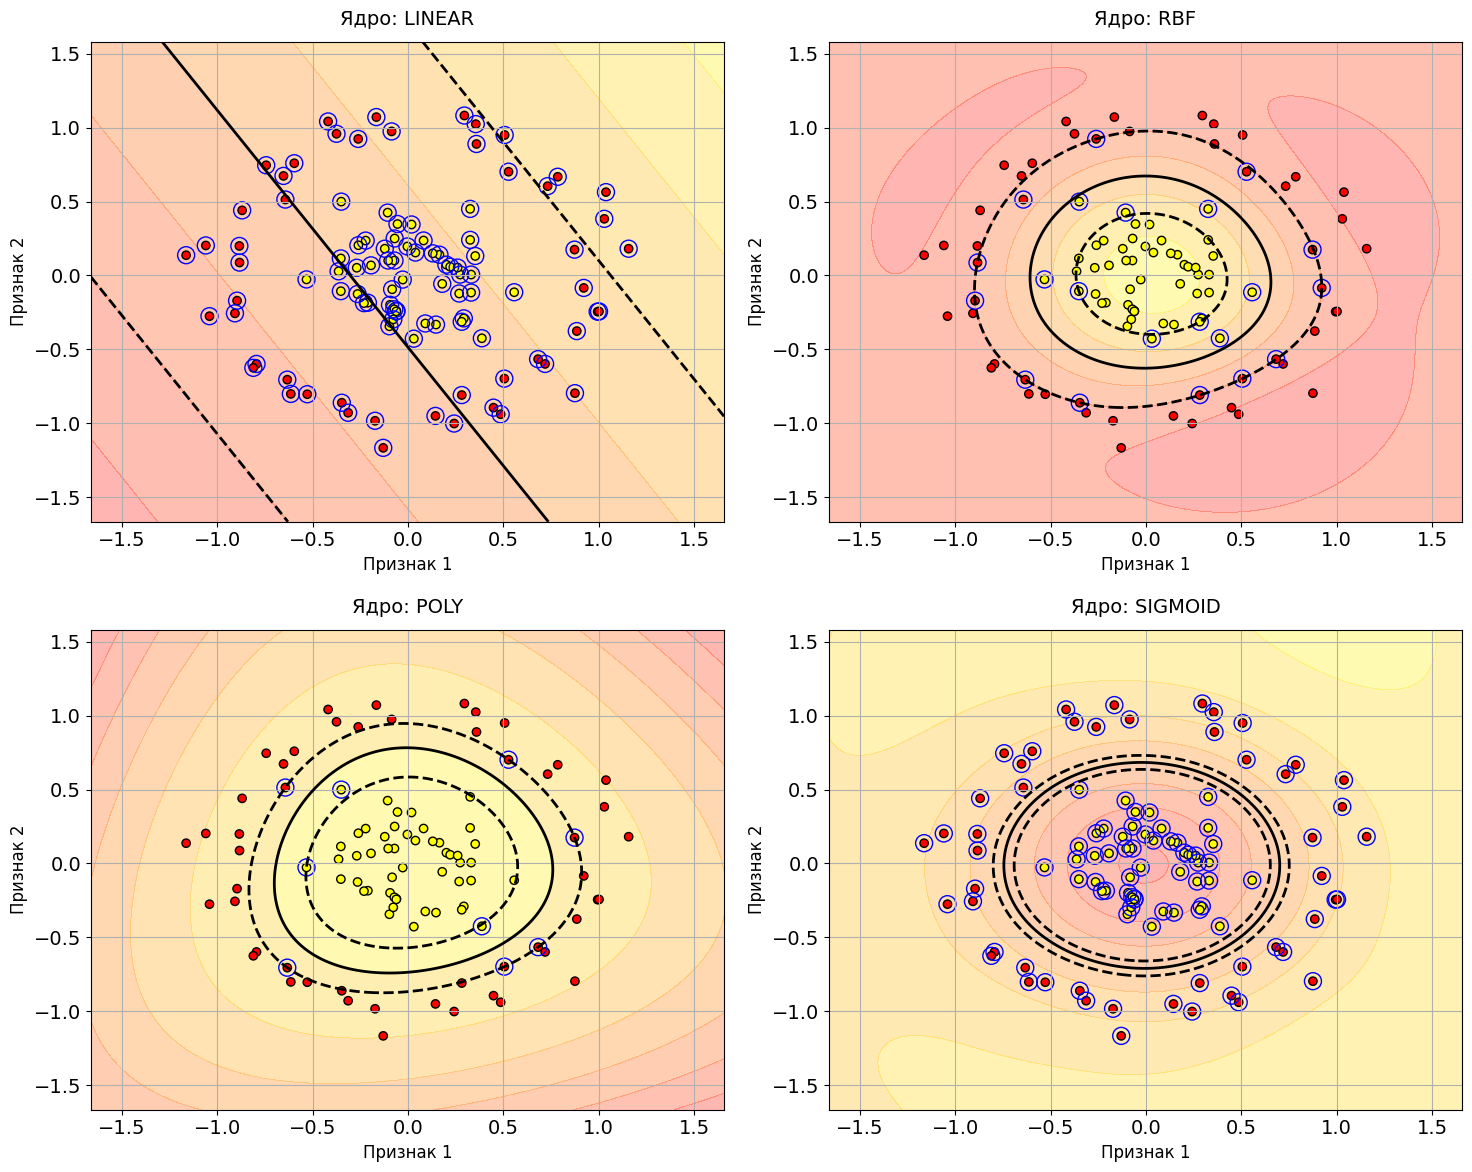

In [13]:
# Код в этой ячейке создан только для визуализации метода опорных векторов, можно его не изучать!

# Генерируем нелинейно разделимые данные
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)

# Настраиваем модели с разными ядрами
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
models = [
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf', gamma='scale'),
    svm.SVC(kernel='poly', degree=3, coef0=1),
    svm.SVC(kernel='sigmoid', coef0=1)
]

for model in models:
    model.fit(X, y)

# Создаем сетку для визуализации
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Графики классификации (2 строки, 2 столбца)
plt.figure(figsize=(15, 12))  # Увеличиваем размер фигуры

for i, (model, kernel) in enumerate(zip(models, kernels), 1):
    Z = model.decision_function(grid).reshape(xx.shape)
    
    # Меняем параметры subplot: 2 строки, 2 столбца
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='autumn')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k', 
                linestyles=['--', '-', '--'], linewidths=2)
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn', edgecolors='k')
    plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
                s=150, facecolors='none', edgecolors='blue')
    plt.title(f'Ядро: {kernel.upper()}', pad=12, fontsize=14)
    plt.grid(True)
    plt.xlabel('Признак 1', fontsize=12)
    plt.ylabel('Признак 2', fontsize=12)

plt.tight_layout()
plt.show()

## Метод опорных векторов для задачи регрессии

Метод опорных векторов может быть использован не только для задачи клдассификации, но и для задачи регрессии. Идея метода опорных векторов для регрессии заключается в поиске гиперплоскости, которая минимизирует ошибку предсказания, ограничивая при этом допустимые отклонения для большинства точек данных. В отличие от метода наименьших квадратов, метод опорных векторов фокусируется на минимизации ошибки только для точек, выходящих за пределы заданного "коридора" (ε-трубки), что делает модель устойчивой к выбросам.

**Ключевые принципы**
1. Гиперплоскость строится так, чтобы как можно больше точек лежало в пределах полосы шириной 2ε вокруг предсказанных значений.
2. Точки, лежащие вне ε-трубки, становятся опорными векторами и определяют форму гиперплоскости. Их количество влияет на сложность модели
3. Для нелинейных зависимостей метод также использует функции ядра (RBF, полиномиальные и др.), которые преобразуют данные в пространство более высокой размерности, где линейная регрессия становится возможной.

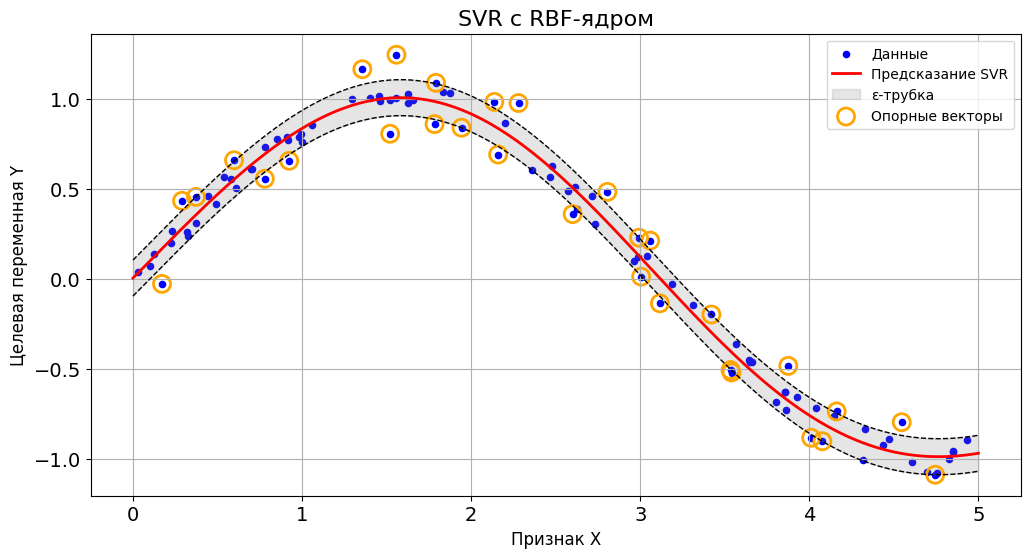

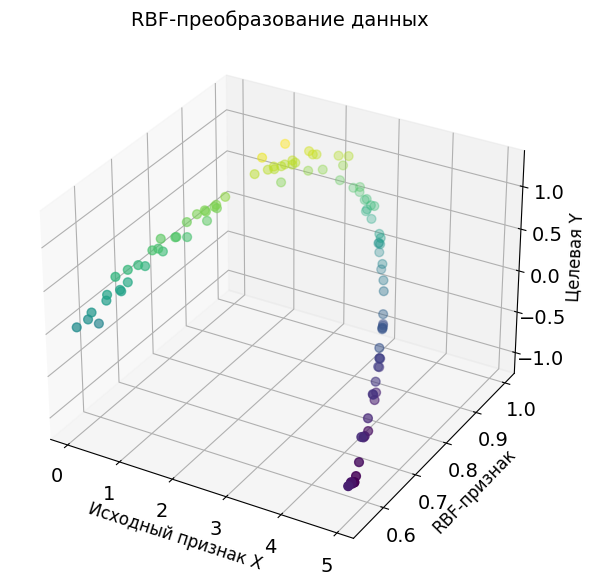

<Figure size 640x480 with 0 Axes>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Генерируем синтетические данные
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Создаем модель с RBF-ядром
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X, y)

# Визуализация
plt.figure(figsize=(12, 6))
X_test = np.linspace(0, 5, 300).reshape(-1, 1)
y_pred = model.predict(X_test)

# Основной график
plt.scatter(X, y, color='blue', label='Данные', s=20)
plt.plot(X_test, y_pred, color='red', lw=2, label='Предсказание SVR')
plt.plot(X_test, y_pred + model.epsilon, 'k--', lw=1)
plt.plot(X_test, y_pred - model.epsilon, 'k--', lw=1)
plt.fill_between(X_test.ravel(), y_pred - model.epsilon, y_pred + model.epsilon, 
                 color='gray', alpha=0.2, label='ε-трубка')

# Опорные векторы
plt.scatter(X[model.support_], y[model.support_], 
            s=150, facecolors='none', edgecolors='orange', 
            linewidths=2, label='Опорные векторы')

plt.title('SVR с RBF-ядром', fontsize=16)
plt.xlabel('Признак X', fontsize=12)
plt.ylabel('Целевая переменная Y', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)

# 3D-визуализация RBF-преобразования
def plot_3d_rbf():
    X_rbf = np.exp(-0.1 * (X - 2.5)**2)  # RBF-преобразование
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, X_rbf, y, c=y, cmap='viridis', s=40)
    ax.set_title('RBF-преобразование данных', fontsize=14)
    ax.set_xlabel('Исходный признак X', fontsize=12)
    ax.set_ylabel('RBF-признак', fontsize=12)
    ax.set_zlabel('Целевая Y', fontsize=12)
    plt.show()

plot_3d_rbf()
plt.tight_layout()
plt.show()

## Метод опорных векторов в `sklearn`

В библиотеке `sklearn` для построения регрессии методом опорных векторов есть класс `SVR`, а для классификации - класс `SVC`.

In [15]:
# Импорт классов

from sklearn.svm import SVC
from sklearn.svm import SVR

**(!)** Для заметки: в библиотеке `sklearn` реализованы и другие классы, использующие алгоритм метода опорных векторов. Более подробно см. https://scikit-learn.org/stable/api/sklearn.svm.html

Для реализации метода опорных векторов рассмотрим задачу классификации - предсказание анемии у пациентов.

В файле `d_output.csv` в виде таблицы представлен набор данных, содержащий следующие столбцы:

- Sex - пол пациента:M - male (мужчина), F - female (женщина);
- %Red Pixel - процент красных пикселей на изображении конъюнктивы глаза пациента;
- %Green pixel - процент зеленых пикселей на изображении конъюнктивы глаза пациента;
- %Blue pixel - процент синих пикселей на изображении конъюнктивы глаза пациента;
- Hb - уровень гемоглобина, г/дл;
- Anaemic - наличие анемии: Yes - есть, No - нет.

Изображения получены путем фотографирования конъюнктивы глаза пациентов в трех медицинских колледжах Бангладеш. Такие изображения позволяют анализировать цветовые характеристики тканей глаза. Они разбиваются на отдельные цветовые каналы — красный (Red), зеленый (Green) и синий (Blue) и вычисляется процентное соотношение пикселей каждого цвета относительно общего числа пикселей в изображении.

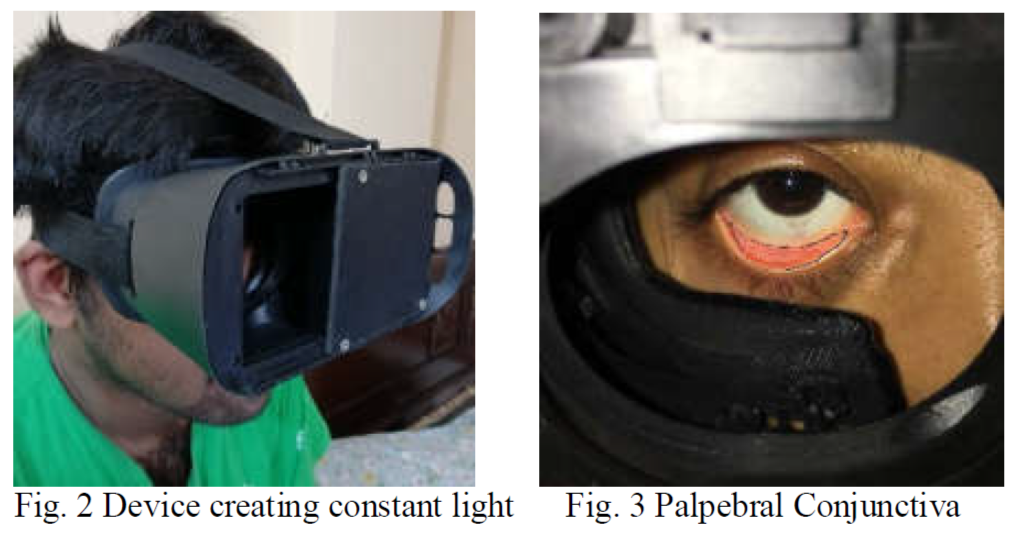


**Изображения из статьи:** ***Noor N. B., Anwar M. S., Dey M. Comparative study between decision tree, SVM and KNN to predict anaemic condition //2019 IEEE International Conference on Biomedical Engineering, Computer and Information Technology for Health (BECITHCON). – IEEE, 2019. – С. 24-28.***

### Загрузка и предварительная обработка данных

Загрузим данные и выведем первыя 5 строк таблицы.

In [16]:
import pandas as pd
df = pd.read_csv('d_output.csv', index_col='Number')
df.head()

Sex  %Red Pixel  %Green pixel  %Blue pixel        Hb Anaemic
Number                                                             
1        M   43.170845     30.945626    25.921971  6.252659     Yes
2        F   43.163481     30.306974    26.759843  8.578865     Yes
3        F   46.269997     27.315656    26.028556  9.640936     Yes
4        F   45.054787     30.469816    24.460797  4.794217     Yes
5       M    45.061884     31.218572    24.071714  8.865329     Yes

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           500 non-null    object 
 1   %Red Pixel    500 non-null    float64
 2   %Green pixel  500 non-null    float64
 3   %Blue pixel   500 non-null    float64
 4   Hb            500 non-null    float64
 5   Anaemic       500 non-null    object 
dtypes: float64(4), object(2)
memory usage: 27.3+ KB


Необходимо провести предварительную обработку и визуализацию данных. Здесь приведем только несколько ключевых моментов по предобработке и визуализации.

In [18]:
df['Sex'].unique()

array(['M', 'F', 'M ', 'F '], dtype=object)

В данных есть неточность в колонке, в которой отмечен пол пациенты - в некоторых вариантах указан пробел, что привело к тому, что полчилось 4 разных варианта пола. Исправим это, убрав пробел в название пола.

In [19]:
df = df.replace('M ', 'M', regex=True)
df = df.replace('F ', 'F', regex=True)

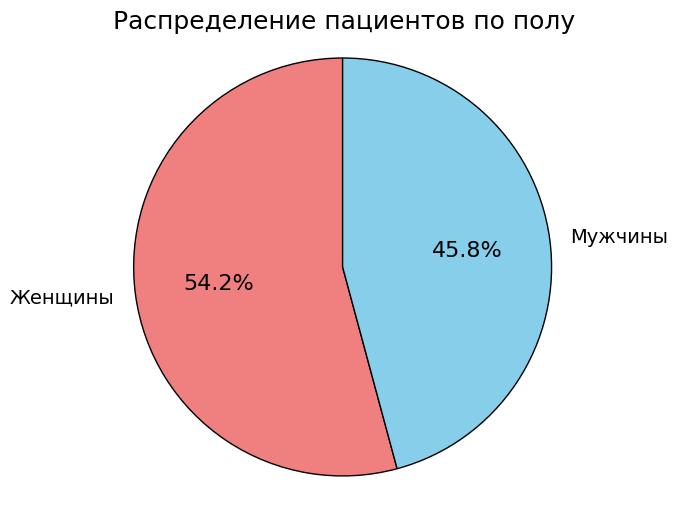

In [20]:
sex_counts = df['Sex'].value_counts()
labels_map = {'F': 'Женщины', 'M': 'Мужчины'}
sex_labels = sex_counts.index.map(labels_map)

plt.figure(figsize=(8, 6))
plt.pie(
    sex_counts,
    labels=sex_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'skyblue'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Распределение пациентов по полу')
plt.axis('equal')
plt.show()


В данных примерно равное количество мужчин и женщин.

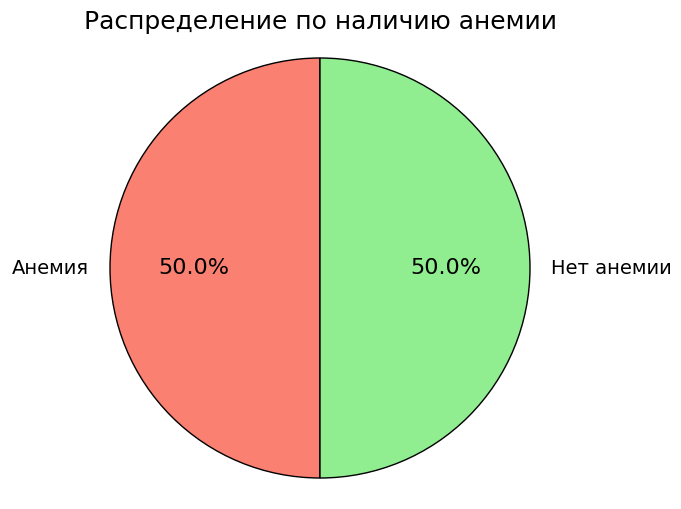

In [21]:
anaemic_counts = df['Anaemic'].value_counts()

labels_map = {'No': 'Нет анемии', 'Yes': 'Анемия'}
anaemic_labels = anaemic_counts.index.map(labels_map)

plt.figure(figsize=(8, 6))
plt.pie(
    anaemic_counts,
    labels=anaemic_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['salmon', 'lightgreen'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Распределение по наличию анемии')
plt.axis('equal')
plt.show()


Дисбаланса классов нет!

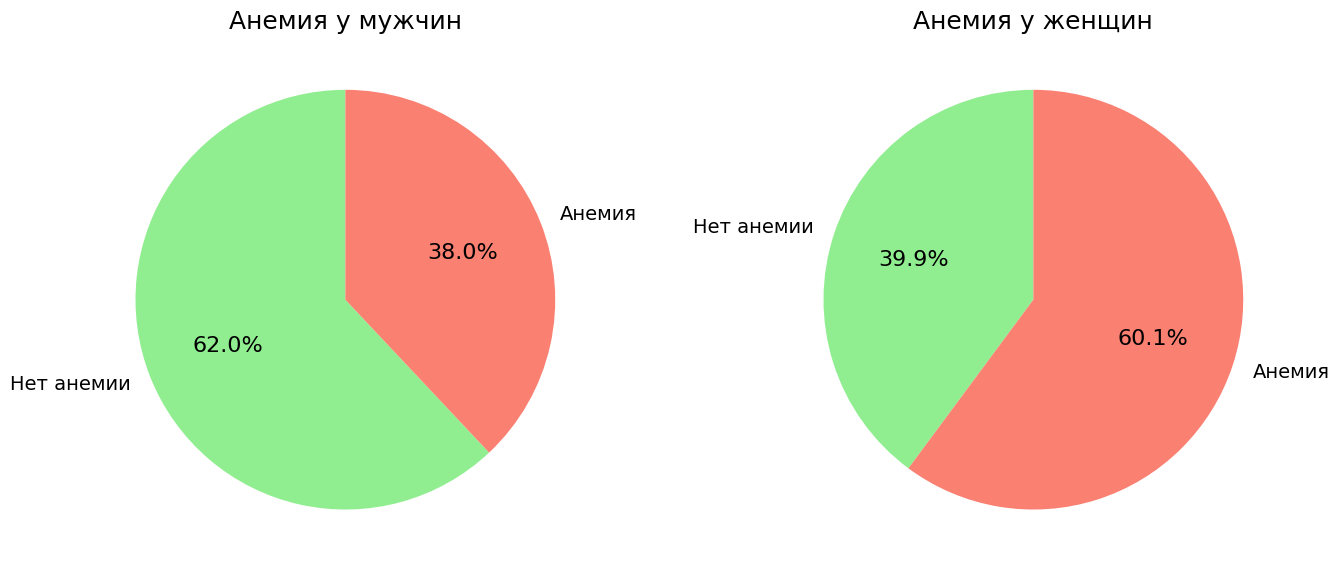

In [22]:
cross_tab = pd.crosstab(df['Sex'], df['Anaemic'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Словарь с русскими переводами
sex_translation = {'M': 'мужчин', 'F': 'женщин'}

for i, sex in enumerate(['M', 'F']):
    axes[i].pie(
        cross_tab.loc[sex],
        labels=['Нет анемии', 'Анемия'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightgreen', 'salmon']
    )
    axes[i].set_title(f'Анемия у {sex_translation[sex]}')  # Используем перевод

plt.tight_layout()
plt.show()



Кажется, что женщины чаще болеют анемией, чем мужчины. Так ли это?

**Задание**

При помощи критерия хи-квадрат Пирсона проверьте статистическую гипотезу о равенстве процента заболевших анемией мужчин и женщин.

In [23]:
# в этой ячейке должен быть Ваш код

Подготовим данные для построения моделей:
- разделим признаки на входные и целевой;
- разделим выборку на обучающую и тестовую в соотношении 70% и 30%.
- укажем категориальные и количественные признаки;
- проведем кодирование входных признаков с использованием `OneHotEncoder`;
- проведем масштабирование с использованием `StandardScaler`;
- проведем кодирование целевого признака с использованием `LabelEncoder`.

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
RANDOM_STATE=4

X = df.drop(columns=['Anaemic'])
y = df['Anaemic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y) 
cat_col_names = ['Sex']
num_col_names = ['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']

In [25]:
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Построение моделей

Потсроим модель логистической регресии.

In [27]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(class_weight='balanced', penalty = 'l2', C=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r = accuracy_score(y_test, y_pred)
print(f'Accuracy модели  на тестовой выборке равна {r: .2%}')

Accuracy модели  на тестовой выборке равна  93.33%


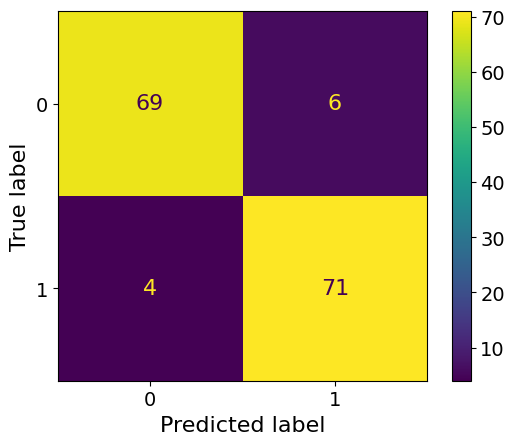

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Качество модели хорошее, accuracy - 93%, на тестовых данных модель ошиблась лишб 10 случаях. Посмотрим, как справится с этой задачей метод опорных векторов.

In [29]:
model_SVC = SVC(kernel='linear')
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
r = accuracy_score(y_test, y_pred)
print(f'Accuracy модели  на тестовой выборке равна {r: .2%}')

Accuracy модели  на тестовой выборке равна  99.33%


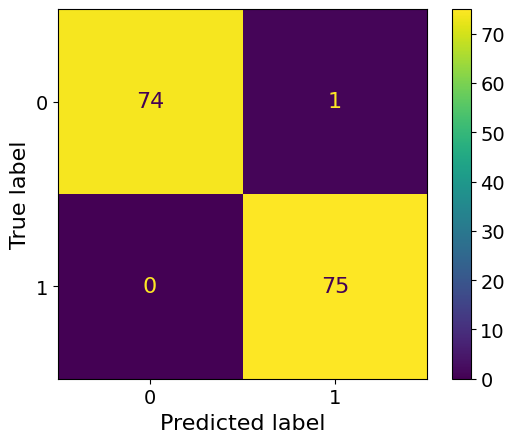

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Качество модели впечатляет! Лиш 1 объект из 150 был ошибочно классифицирован. Модель оказалась лучше простой логистической регрессии. Посмотрим, как связаны между собой признаки. Построим мматрицу корреляций $\phi_k$

In [31]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x1000 with 0 Axes>

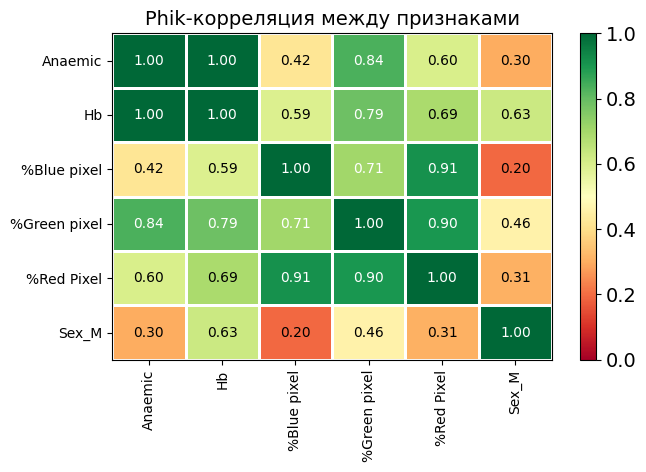

In [32]:
import phik
from phik.report import plot_correlation_matrix

Xy_train = X_train.copy()
Xy_train['Anaemic'] = y_train
# Выбираем все признаки (числовые + категориальные после OHE)
features = Xy_train.columns.tolist()

# Рассчитываем phik-матрицу
phik_matrix = Xy_train.phik_matrix(interval_cols=num_col_names + ['Anaemic'] , njobs=1) 

# Визуализация
plt.figure(figsize=(12, 10))
plot_correlation_matrix(phik_matrix.values, 
                       x_labels=phik_matrix.columns, 
                       y_labels=phik_matrix.index,
                       vmin=0, vmax=1,
                       title='Phik-корреляция между признаками'
                       )
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show();

Основной вклад в предсказание модели вносит признак "Уровень гемоглобина". Мулитиколлинеарности между входными признаками нет.

Для визуализации результатов разделения методои опорных векторов есть библиотека `mlxtend`. Она строит проекции данных и разделующей шиперплоскости на плоскость заданых пар признаков. Установи библиотеку и посмотрим как выглядят эти проекции для наиболее значимых пар признаков.

In [33]:
!pip install mlxtend

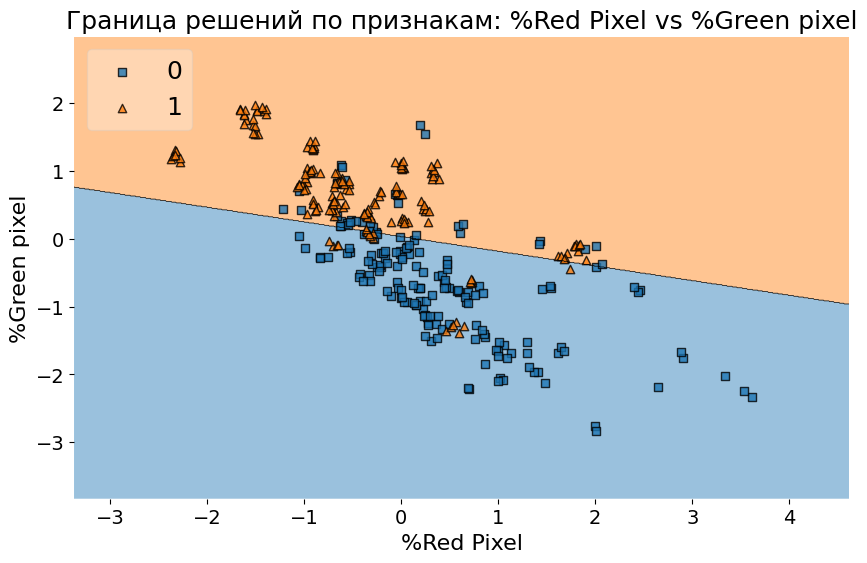

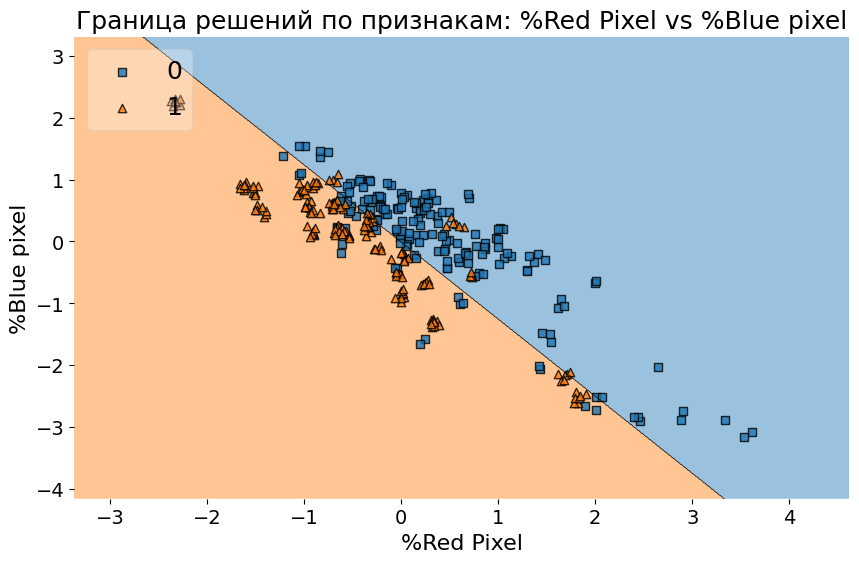

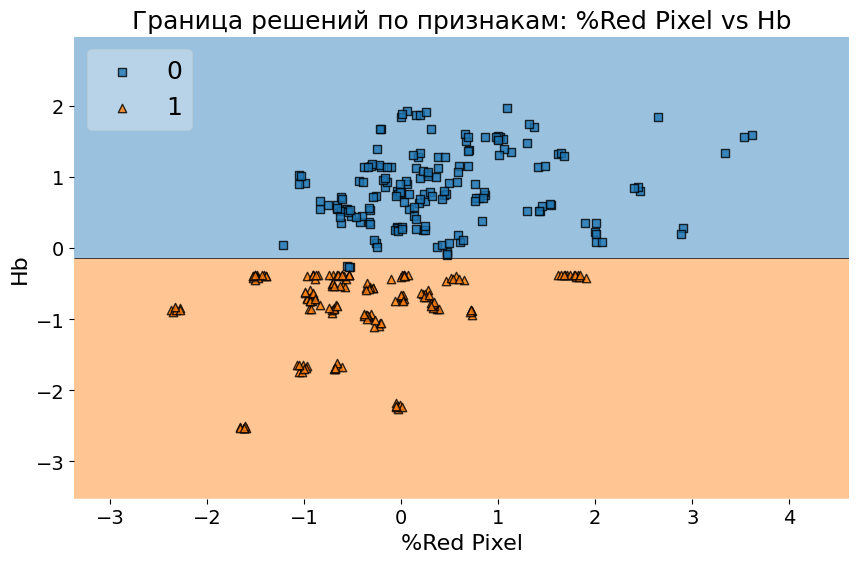

In [34]:
from mlxtend.plotting import plot_decision_regions

# Парные проекции наиболее важных признаков
feature_pairs = [
    ('%Red Pixel', '%Green pixel'),
    ('%Red Pixel', '%Blue pixel'),
    ('%Red Pixel', 'Hb')
]

for feat1, feat2 in feature_pairs:
    # Выбираем два признака
    X_pair = X_train[[feat1, feat2]].values
    
    # Обучаем модель только на этих признаках
    model_pair = SVC(kernel='linear')
    model_pair.fit(X_pair, y_train)
    
    # Визуализация
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_pair, y_train, clf=model_pair, legend=2)
    plt.title(f'Граница решений по признакам: {feat1} vs {feat2}')
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.show()


Лучшее разделение в проекции признаков `Hb` - `%Red Pixel%`. Неудивительно, ведь уровень гемоглобина служит ключевым биомаркером анемии, а палпебральная конъюнктива богата кровеносными сосудами, а её цвет напрямую зависит от концентрации гемоглобина. При анемии снижение количества эритроцитов и гемоглобина приводит к побледнению слизистых, что можно количественно оценить через долю красных пикселей на изображениях.

Задача станет интереснее с практической точки зрения, если удастся предсказывать анемию неизвазивными методами, то есть без забора крови для исследования уровня гемоглобина.

## Прогноз анемии без информации о гемоглобине

Подготовка данных для моделей:
- разделим признаки на входные и целевой;
- разделим выборку на обучающую и тестовую в соотношении 70% и 30%.
- укажем категориальные и количественные признаки;
- проведем кодирование входных признаков с использованием `OneHotEncoder`;
- проведем масштабирование с использованием `StandardScaler`;
- проведем кодирование целевого признака с использованием `LabelEncoder`.

In [36]:
X = df.drop(columns=['Anaemic', 'Hb'])
y = df['Anaemic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y) 
cat_col_names = ['Sex']
num_col_names = ['%Red Pixel', '%Green pixel', '%Blue pixel']

In [37]:
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Проверим корреляции между признаками.

<Figure size 1200x1000 with 0 Axes>

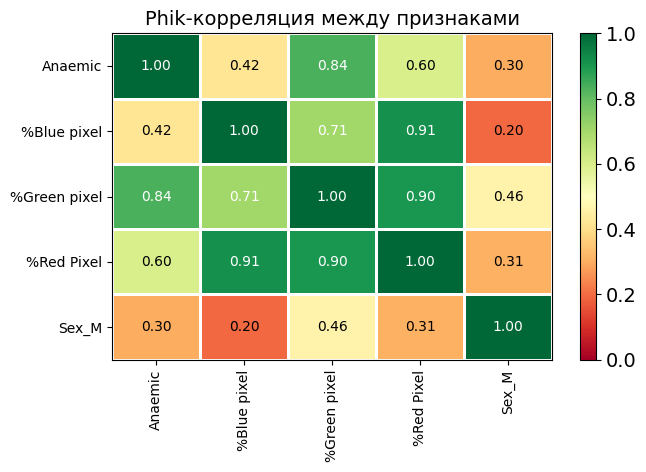

In [39]:
import phik
from phik.report import plot_correlation_matrix

Xy_train = X_train.copy()
Xy_train['Anaemic'] = y_train
# Выбираем все признаки (числовые + категориальные после OHE)
features = Xy_train.columns.tolist()

# Рассчитываем phik-матрицу
phik_matrix = Xy_train.phik_matrix(interval_cols=num_col_names + ['Anaemic'] , njobs=1) 

# Визуализация
plt.figure(figsize=(12, 10))
plot_correlation_matrix(phik_matrix.values, 
                       x_labels=phik_matrix.columns, 
                       y_labels=phik_matrix.index,
                       vmin=0, vmax=1,
                       title='Phik-корреляция между признаками'
                       )
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show();

Мультиколлинеарности нет.

Построим модель логистической регрессии.

In [40]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(class_weight='balanced', penalty = 'l2', C=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r = accuracy_score(y_test, y_pred)
print(f'Accuracy модели  на тестовой выборке равна {r: .2%}')

Accuracy модели  на тестовой выборке равна  78.00%


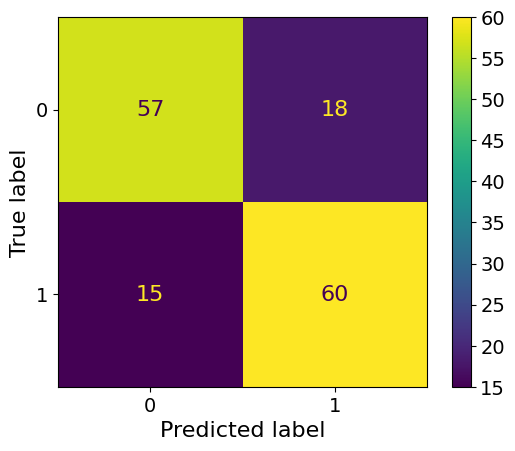

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Качество стало значительно хуже: точность лишь 78%, ошибочные прогнозы в 33 случаях из 150.

Построим модель метода опорных векторов: выберем нелинейное ядро, так так линейное разделение, используемое в логистической регрессии не очень помогло; зададим жесткий зазор для точного разделения классов ($C=100$); сложность границы разделения зададим при помощи параметра $\gamma=5$.

In [53]:
model_SVC = SVC(kernel='rbf', gamma=5, C=100)
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
r = accuracy_score(y_test, y_pred)
print(f'Accuracy модели  на тестовой выборке равна {r: .2%}')

Accuracy модели  на тестовой выборке равна  95.33%


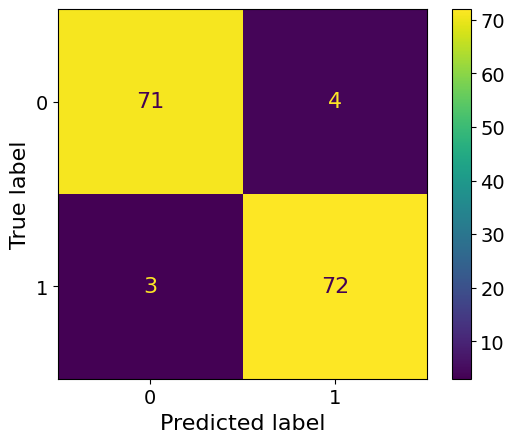

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Модель очень хорошо предсказывает анемию и без знания уровня гемоглобина, точность прогноза на тестовой выборке 95%. Посмотрим разделение на лкассы в проекциях на признаки, характеризующие изображения.

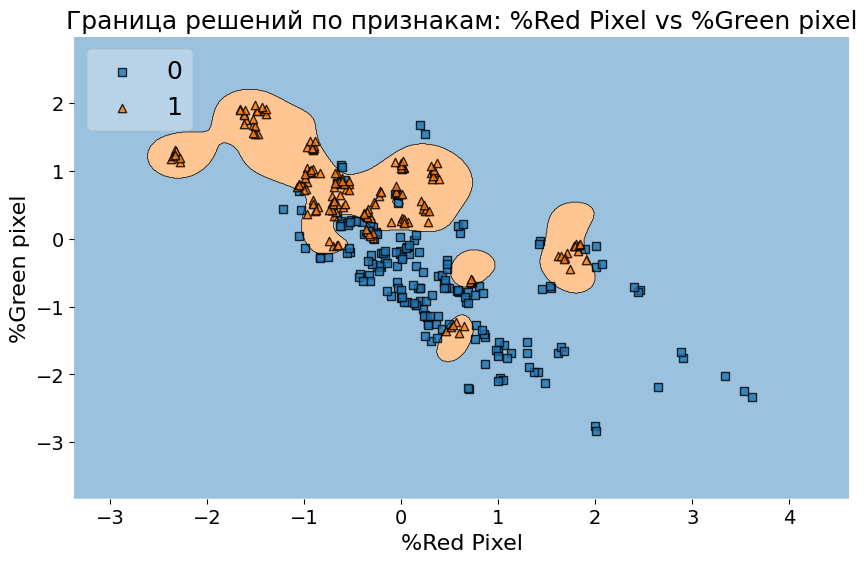

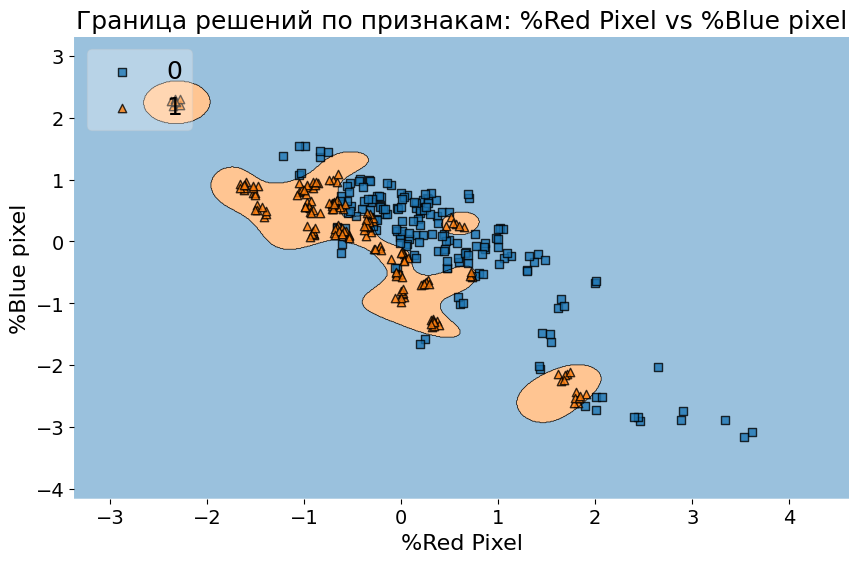

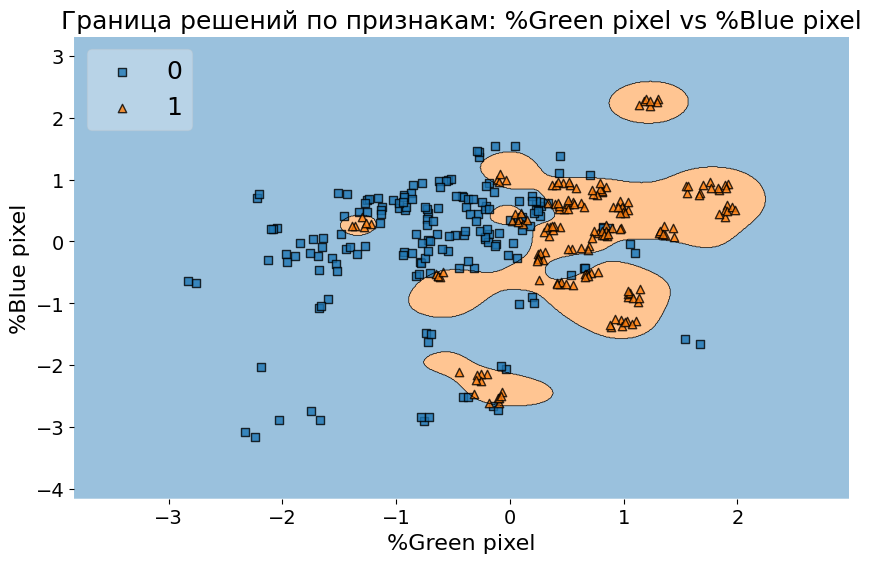

In [51]:
# Парные проекции признаков
feature_pairs = [
    ('%Red Pixel', '%Green pixel'),
    ('%Red Pixel', '%Blue pixel'),
    ('%Green pixel', '%Blue pixel'),
   
]

for feat1, feat2 in feature_pairs:
    # Выбираем два признака
    X_pair = X_train[[feat1, feat2]].values
    
    # Обучаем модель только на этих признаках
    model_pair = SVC(kernel='rbf', gamma=5, C=100)
    model_pair.fit(X_pair, y_train)
    
    # Визуализация
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_pair, y_train, clf=model_pair, legend=2)
    plt.title(f'Граница решений по признакам: {feat1} vs {feat2}')
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.show()


Границы получились сложными, но они отражают общую тенденцию в данных, так как хорошо "отработали" не тестовой выборке.

Отметим ключевые различия модели логистической регрессии (LR) и метода опорных векторов (SVM).

1. Интерпретируемость
    - LR: коэффициенты имеют четкую клиническую интерпретацию (напр., $\beta=0.5$ → увеличение признака на 1 единицу повышает шанс болезни в $e^{0.5} ≈ 1.65 раза$);
    - SVM: "Чёрный ящик" — сложно объяснить вклад отдельных признаков в диагноз.

2. Работа с данными
    - LR: эффективна для линейно разделимых данных, напр., прогноз диабета по  уровню гликированного гемоглобина(HbA1c) и ИМТ;
    - SVM: лучше справляется с нелинейными границами, напр., классификация опухолей по геномным данным.

3. Устойчивость к переобучению
    - LR: требует регуляризации (L1/L2) при множестве признаков.
    - SVM: устойчивее за счёт максимизации зазора.

4. Скорость
    - LR: быстрее на больших выборках (1 млн пациентов → ~10 сек);
    - SVM: замедляется при больших N или использовании сложных ядер (RBF).

Для решения задачи многоклассовой классификации можно использовать тот же класс, что был нами ранее использован для логистической регресии - `OneVsRestClassifier` из `sklearn.multiclass` - по принципу "один против всех" (`OVR`). Если же использовать метод опорных векторов без класса `OneVsRestClassifier`, то он, по умолчанию, применить к многоклассовым данным принцип "один против одного" (`OVO`), встроенный в класс `SVC`. Подробное описание принципов было в практических занятиях 3.2 и 3.3.

***Зачетное задание по теме***

Во втором практическом занятии 3-го модуля в качестве зачетного задания по теме была предложена задача бинарной  классификации определения доброкачественности (`benign`) или злокачественности (`malignant`) опухоли груди на основе данных, полученных из изображений, созданных при помощи тонкоигольной аспирационной биопсии (FNA) опухоли груди (файл `BreastCanser.csv`). Постройте модель опорных векторов. Для этого:

1. 1. Загрузите данные.
2. Проведите предварительную подготовку:
    - разделите признаки на входные и целевой;
    - разделите выборку на обучающую, валидационную и тестовую в соотношении 60%, 20% и 20%.
    - укажите категориальные и количественные признаки;
    - проведите масштабирование с использованием `StandardScaler`.
3. Постройте модель опорных векторов для классификации опухоли, оцените её качество на валидационной выборке при помощи метрик `Presicion` и `Recall`.
4. Варьируя параметрами `kernel`, `gamma` и `C` добейтесь максимального качества модели на валидационной выборке.
5. Оцените качество модели на тестовой выборке. Сделайте выводы.

In [2]:
# в этой ячейке должен быть Ваш код
# 1. Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score


In [3]:
# 2. Загрузка данных
df = pd.read_csv('BreastCanser.csv')

# Предполагается, что целевой признак — 'diagnosis' с метками 'B' и 'M'
# Преобразуем в бинарный формат: benign=0, malignant=1
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

# Удалим лишние колонки, если есть (например, 'id', 'Unnamed: 32')
df.drop(columns=['id', 'Unnamed: 32'], errors='ignore', inplace=True)


In [5]:
# 3. Разделение признаков и целевого признака
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [6]:
# 4. Разделение на обучающую (60%), валидационную (20%) и тестовую (20%) выборки с стратификацией
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25*0.8=0.2


In [7]:
# 5. Создание пайплайна с масштабированием и SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])


In [8]:
# 6. Обучение базовой модели и оценка на валидационной выборке
pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)
print(f"Базовая модель - Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Базовая модель - Recall: {recall_score(y_val, y_val_pred):.4f}")


Базовая модель - Precision: 0.9767
Базовая модель - Recall: 0.9767


In [9]:
# 7. Настройка гиперпараметров kernel, gamma и C с помощью GridSearchCV
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)


Лучшие параметры: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}


In [10]:
# 8. Оценка лучшей модели на валидационной выборке
best_model = grid_search.best_estimator_
y_val_pred_best = best_model.predict(X_val)
print(f"Лучшая модель - Precision: {precision_score(y_val, y_val_pred_best):.4f}")
print(f"Лучшая модель - Recall: {recall_score(y_val, y_val_pred_best):.4f}")


Лучшая модель - Precision: 1.0000
Лучшая модель - Recall: 0.5581


In [11]:
# 9. Оценка качества лучшей модели на тестовой выборке
y_test_pred = best_model.predict(X_test)
print(f"Тестовая выборка - Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Тестовая выборка - Recall: {recall_score(y_test, y_test_pred):.4f}")

Тестовая выборка - Precision: 1.0000
Тестовая выборка - Recall: 0.4762


In [12]:
# 10. Выводы
print("Модель SVM с оптимальными параметрами показывает высокое качество классификации опухолей.")


Модель SVM с оптимальными параметрами показывает высокое качество классификации опухолей.


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined a